# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [128]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
# loading data
data = pd.read_csv(
    r"C:\Users\igorm\OneDrive\Desktop\CAREER_DS_BIG DATA\UNIVERSITY OF TEXAS DS_BA\DATA FILES\used_device_data.csv"
)  ##  Fill the blank to read the data

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
# Lets check the data shape to know how many clolumns and rows are in the dataset
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

#### Observations:
* The dataset has 15 columns and 3454 rows.

In [4]:
data.head(10)

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   
5      Honor  Android        16.23  yes   no            13.0   
6      Honor  Android        13.84  yes   no             8.0   
7      Honor  Android        15.77  yes   no            13.0   
8      Honor  Android        15.32  yes   no            13.0   
9      Honor  Android        16.23  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   
5               8.0        64.0  4.0   4000.0   176.0          2020   
6               5.0        32.0  2.0   3020.0   144.0          2020   
7               8.0        64.0  4.0   3400.0   164.0          2020   
8              16.0       128.0  6.0   4000.0   165.0          2020   
9               8.0       128.0  6.0   4000.0   176.0          2020   

   days_used  new_price  used_price  
0        127     111.62       74.26  
1        325     249.39      174.53  
2        162     359.47      165.85  
3        345     278.93      169.93  
4        293     140.87       80.64  
5        223     157.70       82.59  
6        234      91.74       48.34  
7        219     179.24      113.23  
8        161     200.32      132.43  
9        327     159.75      118.30

<IPython.core.display.Javascript object>

#### Observations:
* The columns are: brand_name, os, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, new_price, used_price.
* It is important to remember the units in some of the numerical variables:
  * main_camera_mp: megapixels
  * selfie_camera_mp: megapixels
  * int_memory: Gigabytes (GB)
  * ram: Amount of RAM in Gigabytes (GB)
  * battery: miliamps per hour (mAh)
  * weight: grams (gr)
  * days_used: days
  * new_price: Euros (€)
  * used_price: Euros (€) 
    

In [5]:
# Creating a random sample from the dataset to visualize it
data.sample(n=20, random_state=1)

brand_name       os  screen_size   4g  5g  main_camera_mp  \
866      Others  Android        15.24   no  no            8.00   
957      Celkon  Android        10.16   no  no            3.15   
280     Infinix  Android        15.39  yes  no             NaN   
2150       Oppo  Android        12.83  yes  no           13.00   
93           LG  Android        15.29  yes  no           13.00   
1040     Gionee  Android        12.83  yes  no           13.00   
3170        ZTE   Others        10.16   no  no            3.15   
2742       Sony  Android        12.70  yes  no           20.70   
102       Meizu  Android        15.29  yes  no             NaN   
1195        HTC  Android        10.29   no  no            8.00   
331       Nokia  Android        13.84  yes  no            0.30   
678      Others  Android        12.75  yes  no           13.00   
909      Others  Android        12.75  yes  no           12.00   
2381    Samsung  Android        15.24  yes  no           12.00   
2956     Xiaomi  Android        16.36  yes  no           12.00   
516     Alcatel   Others         7.75   no  no            2.00   
1120      Honor  Android        12.75  yes  no           12.00   
535     Alcatel  Android        12.93  yes  no            8.00   
1490     Lenovo  Android        16.23  yes  no           13.00   
2475    Samsung  Android        12.73  yes  no           16.00   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
866                2.0        16.0  4.00   3000.0   206.0          2014   
957                0.3       512.0  0.25   1400.0   140.0          2013   
280                8.0        32.0  2.00   5000.0   185.0          2020   
2150              16.0        64.0  4.00   3200.0   148.0          2017   
93                 5.0        32.0  3.00   3500.0   179.0          2019   
1040               8.0        32.0  4.00   3150.0   166.0          2016   
3170               5.0        16.0  4.00   1400.0   125.0          2014   
2742               2.0        16.0  4.00   3000.0   170.0          2013   
102               20.0       128.0  6.00   3600.0   165.0          2019   
1195               2.0        32.0  4.00   2000.0   146.0          2015   
331                5.0        16.0  2.00   3000.0   180.0          2020   
678               16.0       128.0  4.00   3000.0   155.0          2017   
909                8.0        64.0  4.00   3100.0   165.0          2018   
2381               8.0        64.0  4.00   3300.0   178.0          2018   
2956               5.0        32.0  4.00   5300.0   211.0          2017   
516                0.3       512.0  0.25   2820.0    98.0          2015   
1120               8.0        32.0  4.00   3000.0   153.0          2016   
535                2.0        32.0  4.00   3400.0   182.0          2014   
1490               8.0       512.0  4.00   3350.0   210.0          2018   
2475               5.0        16.0  4.00   2800.0   145.0          2015   

      days_used  new_price  used_price  
866         632     179.61       56.76  
957         637      48.65       16.45  
280         329      88.88       79.10  
2150        648     281.30      107.54  
93          216     200.42       91.62  
1040        970     279.87      104.13  
3170       1007      69.71       43.14  
2742       1060     330.24       83.33  
102         332     420.17      142.51  
1195        892     131.50       68.57  
331         260     101.28       53.96  
678         783     400.11      192.02  
909         454     189.69       87.58  
2381        504     240.32      125.23  
2956        761     200.13      104.97  
516         786      39.58       17.52  
1120       1039     258.69      120.36  
535         578     280.85      114.75  
1490        660     400.44      176.66  
2475       1084     350.53      137.30

<IPython.core.display.Javascript object>

#### Observations:
* This view give us an idea about the strategy to handle the missing values or any other issue within the dataset.

In [6]:
# Creating a working copy to avoid affecting the original
df1 = data.copy()

<IPython.core.display.Javascript object>

In [7]:
# Lets check the data information to validate the columns names and data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

#### Observations:
* There are a total of 3454 non-null observations in "brand_name", "os", "screen_size", "4g", "5g", "release_year", "days_used", "new_price", " and used_price" columns.
* There are a total of 3275 non-null observations in  "main_camera_mp", 3452 non-null observations in "selfie_camera_mp", 3450 in "int_memory" and "ram" colunms, 3448 in "battery" and 3447 in "weight".
* The dataset contains 15 columns: 4 are object type('brand_name', 'OS', '4g',and '5g'), 9 corresponds to a floating point type ('screen_size', 'main_camera_mp', 'selfie_camera', 'int_memory', 'ram', 'battery', 'weight', 'new_price', 'used_price'), and 2 belongs to integer type('release_year', 'days_used').
* The total memory usage is approximately 404.9 KB.
* We should try to convert the 'object format' to 'category format' as previuously done in other projects to reduce the space requiered to store the dataframe and facilitate the analysis.

In [8]:
# Converting the data from 'object' to 'category' type
df1["brand_name"] = df1["brand_name"].astype("category")
df1["os"] = df1["os"].astype("category")
df1["4g"] = df1["4g"].astype("category")
df1["5g"] = df1["5g"].astype("category")

<IPython.core.display.Javascript object>

In [9]:
# Validating the changes in the category type and memory usage
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3275 non-null   float64 
 6   selfie_camera_mp  3452 non-null   float64 
 7   int_memory        3450 non-null   float64 
 8   ram               3450 non-null   float64 
 9   battery           3448 non-null   float64 
 10  weight            3447 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 312.2 KB


<IPython.core.display.Javascript object>

#### Observations:
* After running again the code data.info() we can validate the change of the data type from 'object' to 'category' in "Brand_name", "os", "4g", and "5g" columns.
* Also, the memory usage was reduce from 404.9 KB to 312.2 KB, representing a reduction of 22% in memory usage.

In [10]:
# Lets have a look into the categorical variables within the dataset
categ_col = df1[["brand_name", "os", "4g", "5g"]]

# Printing number of count of each unique value in each categorical columns
for column in categ_col:
    print(df1[column].value_counts())
    print("-" * 50)

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Vivo          117
Micromax      117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Microsoft      22
OnePlus        22
Coolpad        22
BlackBerry     22
Google         15
Infinix        10
Name: brand_name, dtype: int64
--------------------------------------------------
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64
--------------------------------------------------
yes    2335
no     1119
Name: 4g, dtype: int64
--------------------------------------------------
no     3302
yes     152
Name: 5g, dtype: int64
-----------------------

<IPython.core.display.Javascript object>

#### Observations 1st outcome:
* The top 5 brand names with devices in this dataset corresponds to: Others, Samsung, Huawei, LG, and Lenovo.
* "Others"(502) brand name represents the 14.5% of the sample, Samsung(341) represents the 9.9%, Huawei(251) 7.3%, LG(201) 5.8%, and Lenovo(171) 5%.
* We are going to show and analyze the graphs later on.

#### Observations 2nd outcome:
* Android(3214) operating system represents the 93.1% of the sample while "Others"(137) represents 4%, Windows(67) 1.9%, and IOS(36) 1% .
* We are going to show and analyze the graphs later on. 


#### Observations 3rd outcome:
* For the 4g category, 2335 samples are "Yes", representing the 67.6%. The remaining 32.4%(1119) does not belongs to 4g category.

#### Observations 4th outcome:
*  For the 5g category, just 152 samples are "Yes", representing the 4.4% meanwhile the 95.6%(3302) belongs to "No" category.
* It is important to note that 4g and 5g are not complementary, that is, the device may not be 5g but it does not necessarily mean that it is 4g and vice versa.

In [11]:
# lets have a look on the missing values
df1.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* Only main_camera_mp, weight, battery, int_memory, ram, and selfie_camera_mp, report null values.
* we have a total of 202 null values as follow: 
  * main_camera_mp = 179 (88.6%).
  * weight = 7 (3.46%).
  * battery = 6 (2.97%)
  * int_memory = 4 (1.98%)
  * ram = 4 (1.98%)
  * selfie_camera_mp = 2 (0.99%)
* All these represent numerical variables, which can be replace by the median later.  

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

In [12]:
# Checking the statistical summary of the numerical data
df1.describe().T

count         mean          std      min        25%  \
screen_size       3454.0    13.713115     3.805280     5.08    12.7000   
main_camera_mp    3275.0     9.460208     4.815461     0.08     5.0000   
selfie_camera_mp  3452.0     6.554229     6.970372     0.00     2.0000   
int_memory        3450.0    54.573099    84.972371     0.01    16.0000   
ram               3450.0     4.036122     1.365105     0.02     4.0000   
battery           3448.0  3133.402697  1299.682844   500.00  2100.0000   
weight            3447.0   182.751871    88.413228    69.00   142.0000   
release_year      3454.0  2015.965258     2.298455  2013.00  2014.0000   
days_used         3454.0   674.869716   248.580166    91.00   533.5000   
new_price         3454.0   237.038848   194.302782    18.20   120.3425   
used_price        3454.0    92.302936    54.701648     4.65    56.4825   

                       50%       75%      max  
screen_size         12.830    15.340    30.71  
main_camera_mp       8.000    13.000    48.00  
selfie_camera_mp     5.000     8.000    32.00  
int_memory          32.000    64.000  1024.00  
ram                  4.000     4.000    12.00  
battery           3000.000  4000.000  9720.00  
weight             160.000   185.000   855.00  
release_year      2015.500  2018.000  2020.00  
days_used          690.500   868.750  1094.00  
new_price          189.785   291.115  2560.20  
used_price          81.870   116.245   749.52

<IPython.core.display.Javascript object>

#### Observations:
* Lets have a look on the statistical values of the variables considered critical within the entire process of the consumer decision journey.
  * used_price: the mean is 92.30€, the used prices of the devices are between 4.65 and 749.52€ in this dataset with a standard deviation of 54.70€. The 75% of the data is over 56.48€ meanwhile the 25% of the data is over 116.24€. 
  * new_price: the mean is 237.03€, the new prices of the devices are between 18.20 and 2560.20€ in this dataset with a standard deviation of 88.41€. The 75% of the data is over 120.34€ meanwhile the 25% of the data is over 291.11€.
  * screen_size: the mean is 13.71(5.39 inches) centimeters, the screen size values of the devices are between 5.08(2 inches) and 30.71(12.09 inches) centimeters in this dataset with a standard deviation of 3.80(1.49 inches). The 75% of the data is over 12.70(5 inches) centimeters meanwhile the 25% of the data is over 15.34(6.03 inches) centimeters. The 25% and 75% quantiles are very close from each other.
  * main_camera_mp: the mean is 9.46 megapixels, the main camera megapixels values of the devices are between 0.08 and 48 megapixels in this dataset with a standard deviation of 4.81 megapixels. The 75% of the data is over 5 megapixels meanwhile the 25% of the data is over 13 megapixels.
  * selfie_camera_mp: the mean is 6.55 megapixels, the selfie camera megapixels values of the devices are between 0 and 32 megapixels in this dataset with a standard deviation of 6.97 megapixels. The 75% of the data is over 2 megapixels meanwhile the 25% of the data is over 8 megapixels.
  * int_memory: the mean is 54.57 gigabytes, the internal memory gigabytes values of the devices are between 0.01 and 1024 gigabytes in this dataset with a standard deviation of 84.97 gigabytes. The 75% of the data is over 16 gigabytes meanwhile the 25% of the data is over 64 gigabytes.
  * ram: the mean is 4.03 gigabytes, the ram memory gigabytes values of the devices are between 0.02 and 12 gigabytes in this dataset with a standard deviation of 1.36 gigabytes. The 75% of the data is over 4 gigabytes meanwhile the 25% of the data is over 4 gigabytes.The 25% and 75% quantiles are superimposed on each other.
  * battery: the mean is 33133.40 mAh, the battery miliampers per hour values of the devices are between 500 and 9720 mAh in this dataset with a standard deviation of 1299.68 mAh. The 75% of the data is over 2100 mAh meanwhile the 25% of the data is over 4000 mAh.
  * weight: the mean is 182.7 grams, the weight values of the devices are between 69 and 855 grams in this sample with a standard deviation of 194.30 grams. The 75% of the data is over 142 grams meanwhile the 25% of the data is over 185 grams. The 25% and 75% quantiles are very close from each other.
  * days_used: the mean is 674.86 days, the days_used values of the devices are between 91 and 1094 days used in this sample with a standard deviation of 248.58. The 75% of the data is over 533.5 meanwhile the 25% of the data is over 868.75 days.
    

## Univariate Analysis

* ### Analizing the main aspects of the variables involved in this study.

In [13]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    mean = data[feature].mean()
    median = data[feature].median()
    mode = data[feature].mode()
    mode_count = data[feature].mode().count()

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="seismic"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    # Adding the mean to the histogram
    ax_hist2.axvline(mean, color="green", linestyle="--")
    # Adding the median to the histogram
    ax_hist2.axvline(median, color="black", linestyle="-")
    # Adding the 6 modes to the histogram
    ax_hist2.axvline(mode[0], color="red", linestyle="-", label="Mode1")
    ax_hist2.axvline(mode[1], color="red", linestyle="-", label="Mode1")
    ax_hist2.axvline(mode[2], color="red", linestyle="-", label="Mode1")
    ax_hist2.axvline(mode[3], color="red", linestyle="-", label="Mode1")
    # Adding the mean of the 6 modes to the histogram
    ax_hist2.axvline(mode.mean(), color="purple", linestyle="-")

<IPython.core.display.Javascript object>

In [14]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="gist_ncar",
        order=data[feature].value_counts().index[:n].sort_values(ascending=True),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=16,
            xytext=(1, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### 1.- used_price

In [15]:
df1["used_price"].mode()

0    34.30
1    58.32
2    68.84
3    86.76
dtype: float64

<IPython.core.display.Javascript object>

In [16]:
print(round(df1["used_price"].mode().mean(), 2))

62.06


<IPython.core.display.Javascript object>

In [17]:
df1["used_price"].median()

81.87

<IPython.core.display.Javascript object>

In [18]:
df1["used_price"].mean()

92.30293572669365

<IPython.core.display.Javascript object>

#### Observations:
* The used_price variable shows 4 modes in the data.
* The chart function was set to display all the modes in the graph.
* The mean of the modes is 62.06€

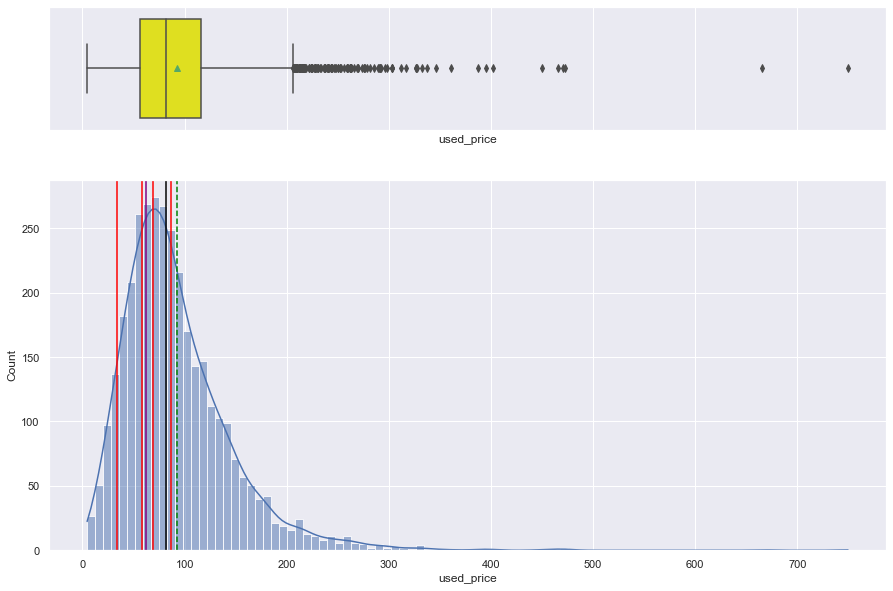

<IPython.core.display.Javascript object>

In [19]:
# Creating the histogram boxplot  for the used_price variable
histogram_boxplot(df1, "used_price", kde=True)

In [20]:
Out_210 = df1[df1["used_price"] > 210].value_counts().sum()
print("There are", Out_210, " outliers above 210€ approximately")

There are 93  outliers above 210€ approximately


<IPython.core.display.Javascript object>

In [21]:
# Creating the log transform variable to used_price and including it in the dataset df1
df1["used_price_log"] = np.log(df1["used_price"])

<IPython.core.display.Javascript object>

<Figure size 360x360 with 0 Axes>

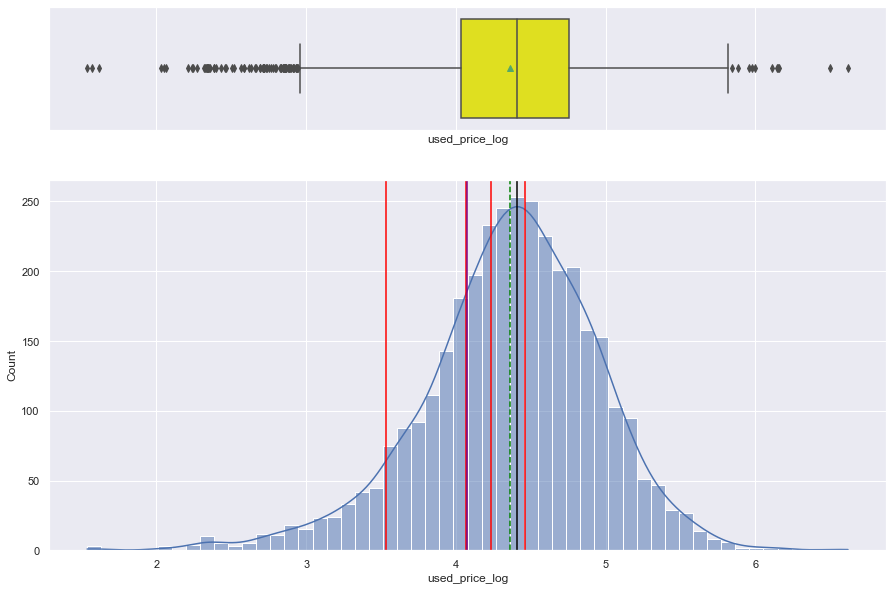

<IPython.core.display.Javascript object>

In [22]:
# Creating an histogram_boxplot for the new variable 'used_price_log'
plt.figure(figsize=(5, 5))
histogram_boxplot(df1, "used_price_log", kde=True)

#### Observations:
* We have 4 modes in this variable ('used_price'): 34.30, 58.32, 68.84, and 86.76 (red lines). The mean of the modes is 4.68.
* The mean is 92.30€ , min 4.65 and max 749.52€, Std 54.70€. 1st quantile 56.48€ and 3rd quantile 116.24€. 
* We can observe a positive(+) skewness so quickly we can infer that "mean > median > mode" as the previous result show. The kurtosis seems to be (+) positive or Leptokurtic.
* We can observe some outliers where the price is greater than the upper whisker approximately around 210€
* We transformed to a logarithmic scale to evaluate if we could reduce the skewness and improve the input for the model. the improvements with the transformations from scale to logarithmic were evident. Now it looks closer to a normal distribution.

## 2.- new_price

In [23]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

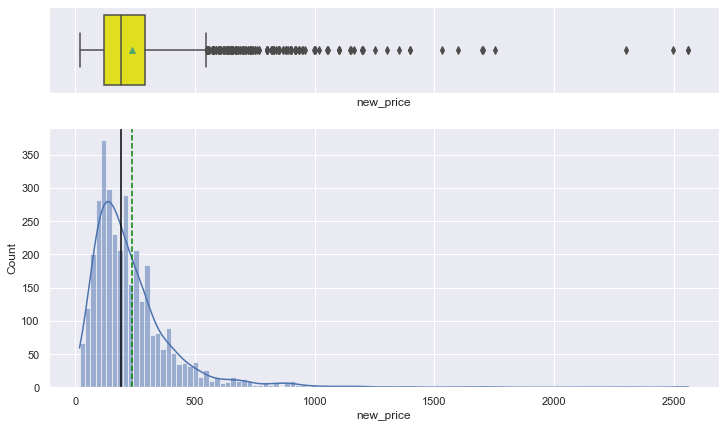

<IPython.core.display.Javascript object>

In [24]:
# Creating the histogram_boxplot for the 'new_price' variable
histogram_boxplot(df1, "new_price", kde=True)

In [25]:
Out_510 = df1[df1["new_price"] > 510].value_counts().sum()
print("There are", Out_510, " outliers above 510€ approximately")

There are 177  outliers above 510€ approximately


<IPython.core.display.Javascript object>

In [26]:
print(round(df1["new_price"].mean(), 2))
print(round(df1["new_price"].median(), 2))
print(round(df1["new_price"].mode(), 2))

237.04
189.79
0    169.99
dtype: float64


<IPython.core.display.Javascript object>

In [27]:
# Creating the log transform variable for new_price and including it in the dataset df1 to try to make it looks like a normal distribution
df1["new_price_log"] = np.log(df1["new_price"])

<IPython.core.display.Javascript object>

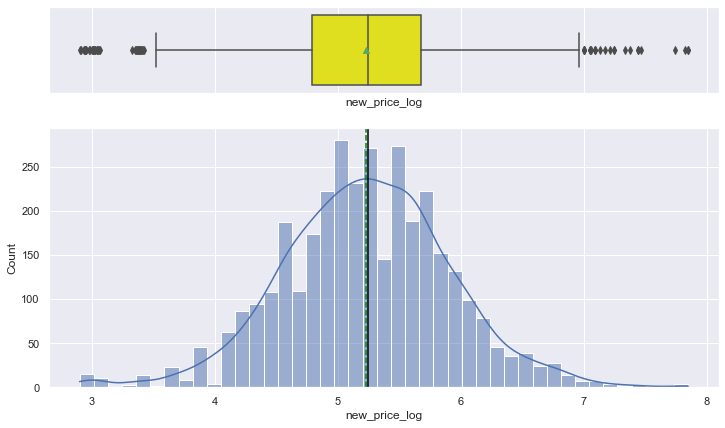

<IPython.core.display.Javascript object>

In [28]:
## Creating an histogram_boxplot for the new variable 'new_price_log'
histogram_boxplot(df1, "new_price_log", kde=True)

#### Observations:
* We have 1 mode(unimodal) in this variable ('new_price'): 169.99€ .
* new_price: the mean is 237.03€ , min 18.20 and max 2560.20€, Std 88.41€. 1st quantile 120.34€ and 3rd quantile 291.11€. 
* Same as used_price we can observe a positive(+) skewness so quickly we can infer that "mean > median > mode" as the previous result show. The kurtosis seems to be (+) positive or Leptokurtic as well.
* We can observe some outliers where the price is greater than the upper whisker approximately around 510€
* we transformed to a logarithmic scale to evaluate if we could reduce the skewness and improve the input for the model. The improvements with the scale transformations to logarithmic were evident. Now, it looks closer to a normal distribution.

### 3.- screen_size

In [29]:
print(round(df1["screen_size"].mean(), 2))
print(round(df1["screen_size"].median(), 2))
print(round(df1["screen_size"].mode(), 2))

13.71
12.83
0    12.7
dtype: float64


<IPython.core.display.Javascript object>

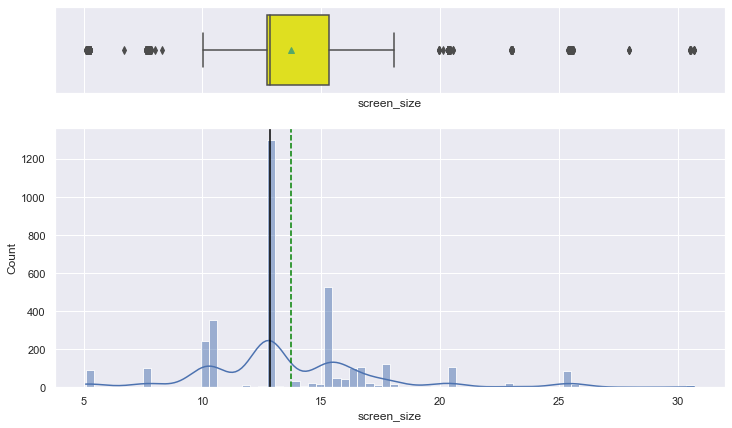

<IPython.core.display.Javascript object>

In [30]:
# Creating the histogram boxplot for the screen_size variable
histogram_boxplot(df1, "screen_size", kde=True)

#### Observations:
* The mode(unimodal) is 12.71 centimeters .
* screen_size: the mean is 13.71(5.39 inches) centimeters, the Min value is 5.08(2 inches) and the Max value is 30.71(12.09 inches) centimeters, the standard deviation of 3.80(1.49 inches). The 1st quartile is 12.70(5 inches) centimeters meanwhile the the 3rd quantile is 15.34(6.03 inches) centimeters. The median is pretty close to the 1st quantile. 
* screen_size data is a discrete data so that could be the reason we see those kind of gaps in the histogram plot. The kurtosis seems to be platykurtic or negative(-).
* We can observe some outliers where the screen size is lower than 10 cm and greater than 18 cm approximately.

### 4.- main_camera_mp

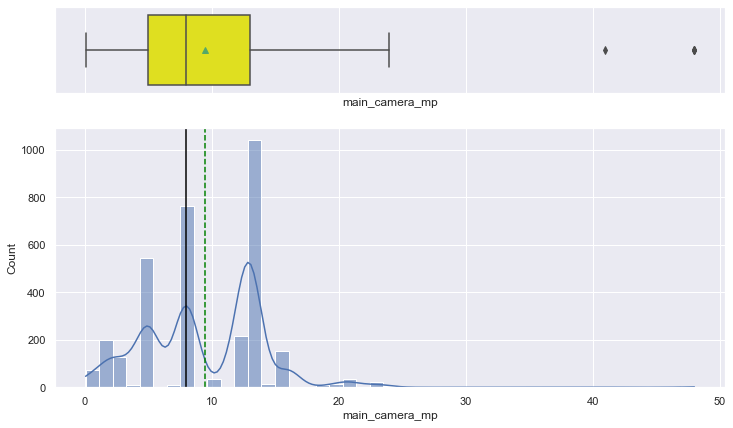

<IPython.core.display.Javascript object>

In [31]:
# Creating the histogram_boxplot for the'main_camera_mp' variable
histogram_boxplot(df1, "main_camera_mp", kde=True)

In [32]:
print(round(df1["main_camera_mp"].mean(), 2))
print(round(df1["main_camera_mp"].median(), 2))
print(round(df1["main_camera_mp"].mode(), 2))

9.46
8.0
0    13.0
dtype: float64


<IPython.core.display.Javascript object>

#### Observations:
* The mode(unimodal) is 13 megapixeles .
* The mean is 9.46 megapixels. the Min values is 0.08 megapixels and the Max value is 48 megapixels.The standard deviation is 4.81 megapixels. The first quantile is 5 megapixels meanwhile the 3rd quantile is 13 megapixels.
* The distribution is pretty irregular. Additionally, we can say as well that the megapixel data is a discrete data.
* Few outliers are observed.

### 5.- selfie_camera_mp

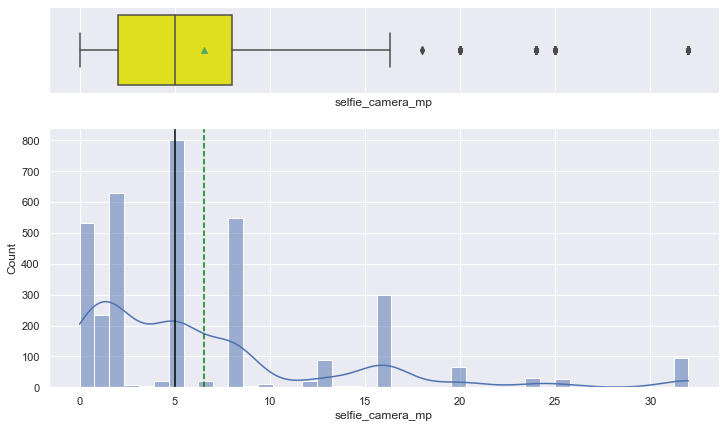

<IPython.core.display.Javascript object>

In [33]:
# Creating the histogram_boxplot for the 'selfie_camera_mp' variable
histogram_boxplot(df1, "selfie_camera_mp", kde=True)

In [34]:
print(round(df1["selfie_camera_mp"].mean(), 2))
print(round(df1["selfie_camera_mp"].median(), 2))
print(round(df1["selfie_camera_mp"].mode(), 2))

6.55
5.0
0    5.0
dtype: float64


<IPython.core.display.Javascript object>

#### Observations:
* The mode(unimodal) is 5 megapixeles .
* The mean is 6.55 megapixels. The Min value is 0 megapixels and the Max value is 32 megapixels.The standard deviation is 6.97 megapixels. The first quantile is 2 megapixels meanwhile the 3rd quantile is 8 megapixels.
* The distribution is pretty irregular. Additionally, we can say as well that the megapixel data is a discrete data.
* Few outliers are observed.

### 6.- int_memory

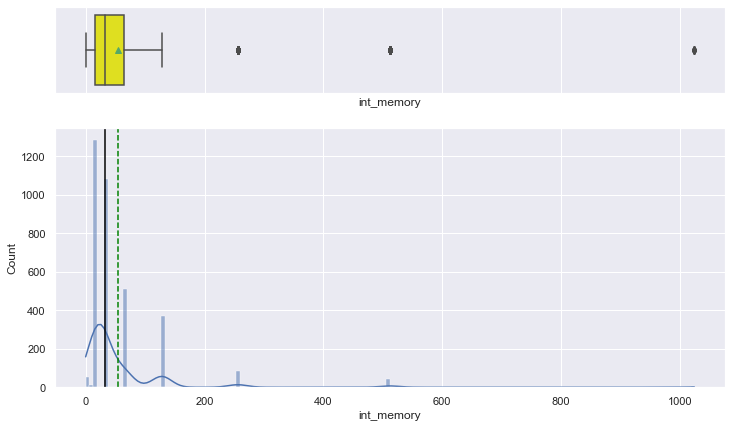

<IPython.core.display.Javascript object>

In [35]:
# Creating the histogram_boxplot for the 'int_memory' Variable
histogram_boxplot(df1, "int_memory", kde=True)

In [36]:
print(round(df1["int_memory"].mean(), 2))
print(round(df1["int_memory"].median(), 2))
print(round(df1["int_memory"].mode(), 2))

54.57
32.0
0    16.0
dtype: float64


<IPython.core.display.Javascript object>

#### Observations:
* The mode(unimodal) is 16 GB .
* The mean is 6.55 54.57 gigabytes. The Min value is 0.01 megapixels and the Max value is 1024 gigabytes.The standard deviation is 84.97 gigabytes. The first quantile is 16 gigabytes meanwhile the 3rd quantile is 64 gigabytes.
* The distribution is influenced by the discrete data. 
* Few outliers are observed.

### 7.- ram

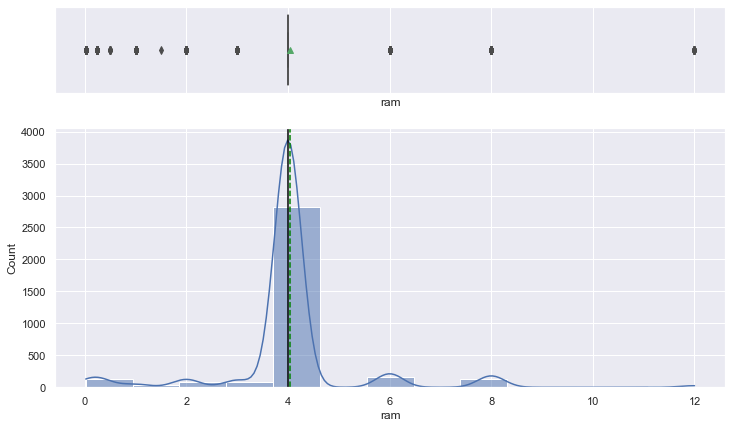

<IPython.core.display.Javascript object>

In [37]:
# Creating the histogram_boxplot for the 'ram' variable
histogram_boxplot(df1, "ram", kde=True)

In [38]:
print(round(df1["ram"].mean(), 2))
print(round(df1["ram"].median(), 2))
print(round(df1["ram"].mode(), 2))

4.04
4.0
0    4.0
dtype: float64


<IPython.core.display.Javascript object>

#### Observations:
* The mode(unimodal) is 4.03 GB .
* The mean is 6.55 54.57 gigabytes. The Min value is 0.02 gigabytes and the Max value is 12 gigabytes.The standard deviation is 1.36 gigabytess. The first quantile is 4 gigabytes meanwhile the 3rd quantile is 4 gigabytes.
* The 25% and 75% quantiles are superimposed on each other with the mean, the mode, and the median.
* The distribution is closer to a simmetrical skewness and in turn is leptokurtic strongly influenced by the 4 ram dominance. 
* Some outliers are observed.

### 8.- weight

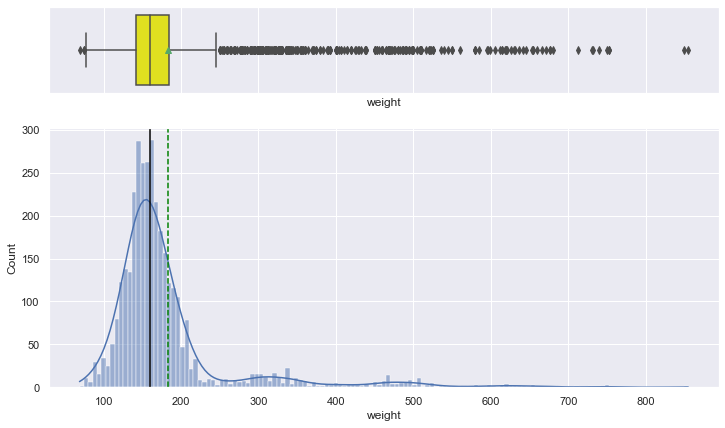

<IPython.core.display.Javascript object>

In [39]:
# creating the histogram_boxplot for the 'weight' variable
histogram_boxplot(df1, "weight", kde=True)

In [40]:
Out_250 = df1[df1["weight"] > 250].value_counts().sum()
print("There are", Out_250, " outliers above 250 grams approximately")

There are 357  outliers above 250 grams approximately


<IPython.core.display.Javascript object>

In [41]:
Out_80 = df1[df1["weight"] < 80].value_counts().sum()
print("There are", Out_80, " outliers below 80 grams approximately")

There are 8  outliers below 80 grams approximately


<IPython.core.display.Javascript object>

In [42]:
# We have to apply the log transform to try to take the distribution of weight closer to normal
df1["weight_log"] = np.log(df1["weight"])

<IPython.core.display.Javascript object>

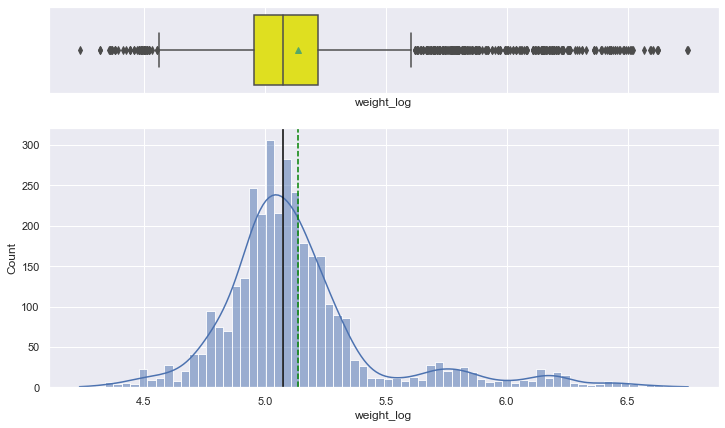

<IPython.core.display.Javascript object>

In [43]:
# Creating the histogram boxplot with weight_log variable to evaluate the changes in the distribution
histogram_boxplot(df1, "weight_log", kde=True)

In [44]:
print(round(df1["weight"].mean(), 2))
print(round(df1["weight"].median(), 2))
print(round(df1["weight"].mode(), 2))

182.75
160.0
0    150.0
dtype: float64


<IPython.core.display.Javascript object>

#### Observations:
* The mode is 150 grams. 
* weight: the mean is 182.75 grams , min 69 and max 855 grams, Std 194.30 grams. 1st quantile 142 grams and 3rd quantile 185 grams.The 25% and 75% quantiles are very close from each other.
* We can observe a positive(+) skewness so quickly we can infer that "mean > median > mode" as the previous result show. The kurtosis seems to be (+) positive or Leptokurtic.
* We can observe some outliers where the weight is under the lower whisker around 80 grams and greater than the upper whisker approximately around 250 grams.
* We transformed to a logarithmic scale to evaluate if we could reduce the skewness and improve the input for the model. the improvements with the transformations to a logarithmic scale were not possible, the skewness is still observed so we decided to drop the variable weight_log previously created and added to the df1 dataframe.

In [45]:
# Dropping the weight_log variable
df1.drop(["weight_log"], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3275 non-null   float64 
 6   selfie_camera_mp  3452 non-null   float64 
 7   int_memory        3450 non-null   float64 
 8   ram               3450 non-null   float64 
 9   battery           3448 non-null   float64 
 10  weight            3447 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

<IPython.core.display.Javascript object>

### 9.- battery

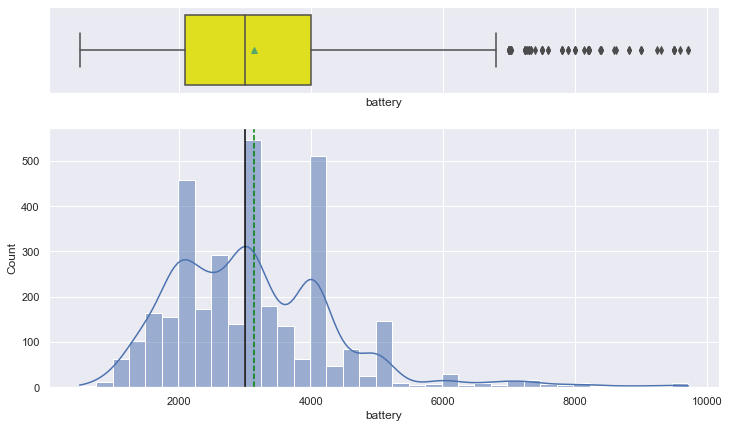

<IPython.core.display.Javascript object>

In [46]:
# Creating the histogram_boxplot for the 'battery' variable
# Pay attention to the cutoff > 4500 mAh according to the previous question
histogram_boxplot(df1, "battery", kde=True)

In [47]:
print(round(df1["battery"].mean(), 2))
print(round(df1["battery"].median(), 2))
print(round(df1["battery"].mode(), 2))

3133.4
3000.0
0    4000.0
dtype: float64


<IPython.core.display.Javascript object>

#### Observations:
* The mode is 4000 mAh. 
* The mean is 33133.40 mAh , min 500 and max 9720 mAh, Std 1299.68 mAh. 1st quantile 2100 mAh and 3rd quantile 4000 mAh.
* The kurtosis seems to be Mesokurtic.
* We can observe some outliers where the battery unit mAh is greater than the upper whisker approximately around 7000 mAh.

### 10.- days_used

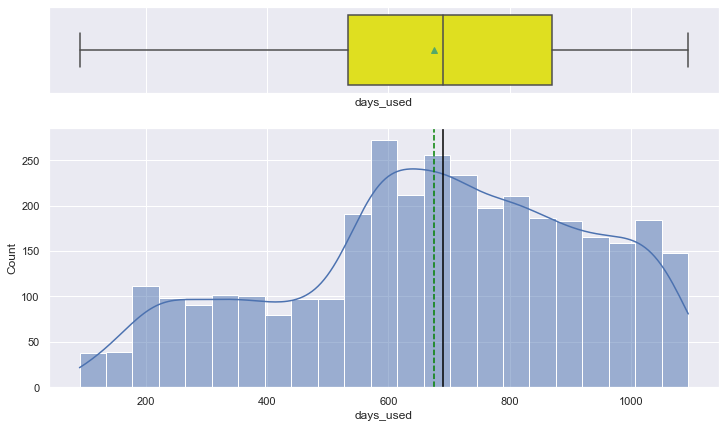

<IPython.core.display.Javascript object>

In [48]:
# Creating the histogram_boxplot for the 'days_used' variable
histogram_boxplot(df1, "days_used", kde=True)

In [49]:
print(round(df1["days_used"].mean(), 2))
print(round(df1["days_used"].median(), 2))
print(round(df1["days_used"].mode(), 2))
print(round(df1["days_used"].mode().mean(), 2))

674.87
690.5
0    564
1    578
2    601
dtype: int64
581.0


<IPython.core.display.Javascript object>

#### Observations:
* There are three modes: 564, 578, and 601 days. 
* The mean is 3674.87 days , min 91 and max 1094 days, Std 248.58 days. 1st quantile is 533.5 days and 3rd quantile 868.75 days.
* The mean and the meadian are very close to each other.
* No outliers are observed.

## Categorical variables 

### 11.- brand_name

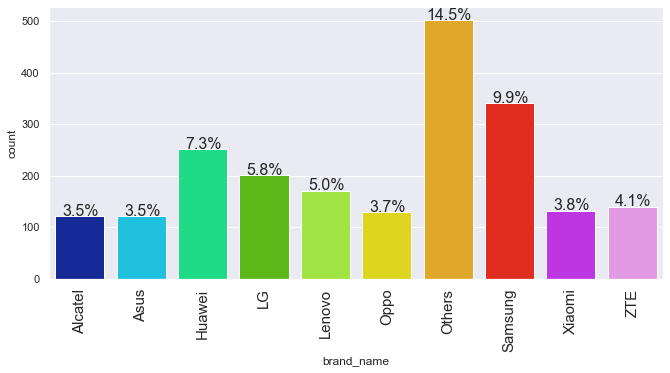

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(df1, "brand_name", perc=True, n=10)

#### Observations:
* The top ten(10) in pecentage weight of the brand name within the dataset is:
 * 1.- Others 14.5%
 * 2.- Samsung 9.9%
 * 3.- Huawei 7.3% 
 * 4.- LG 5.8% 
 * 5.- Lenovo 5%
 * 6.- ZTE 4.1%
 * 7.- Xiaomi 3.8%
 * 8.- Oppo 3.7%
 * 9.- Alcatel 3.5%
 * 10.- Asus 3.5%

### 12.- os

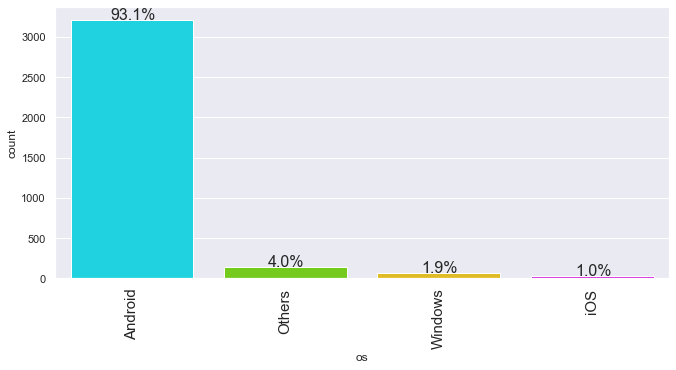

<IPython.core.display.Javascript object>

In [51]:
# Creating the labeled_barplot for the 'os' variable
labeled_barplot(df1, "os", perc=True, n=10)

#### Observations:
* Percentual distribution of the Operating System dominance within the dataset:
 * 1.- Android 93.1%
 * 2.- Others 4.0%
 * 3.- Windows 1.9% 
 * 4.- iOS 1.0%
 
* The imbalance in the samples according to the grouping by operating system is evident. We could talk about bias in the data and ask how the sampling method was.  

### 13.- 4g

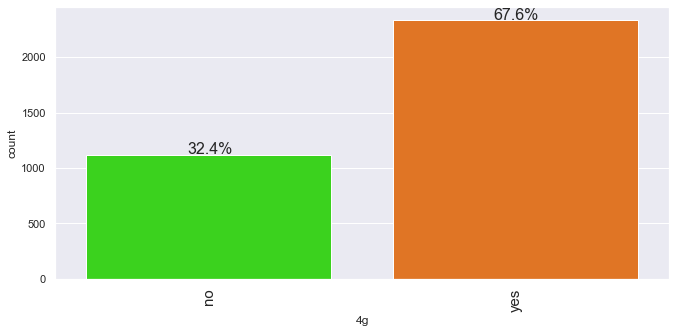

<IPython.core.display.Javascript object>

In [52]:
## Creating the labeled_barplot for the categorical variable '4g'
labeled_barplot(df1, "4g", perc=True, n=10)

#### Observations:
* 67.6% of the sample in the column "4g" has 4g tecnhology meanwhile 32.4% do not. Although, It is important to note that those who do not have 4g do not necessarily have 5g. That is, 4g and 5g are not complementary. These may belong to another category that is not described in the data.

### 14.- 5g

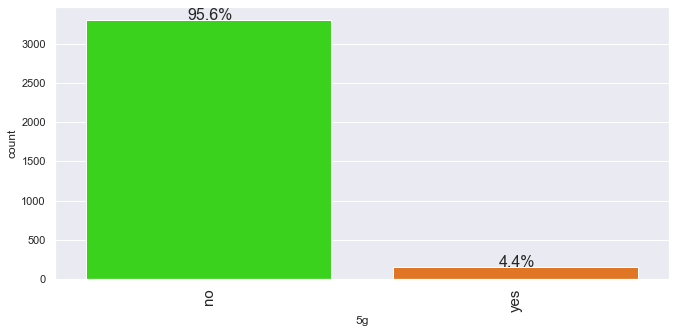

<IPython.core.display.Javascript object>

In [53]:
## Creating the labeled_barplot for the categorical variable '5g'
labeled_barplot(df1, "5g", perc=True, n=10)

#### Observations:
* 95.6% of the sample in the column "5g" has not 5g tecnhology meanwhile 4.4% does it. Although, It is important to note that those who do not have 5g do not necessarily have 4g. That is, 4g and 5g are not complementary. These may belong to another category that is not described in the data.

### 15.-release_year

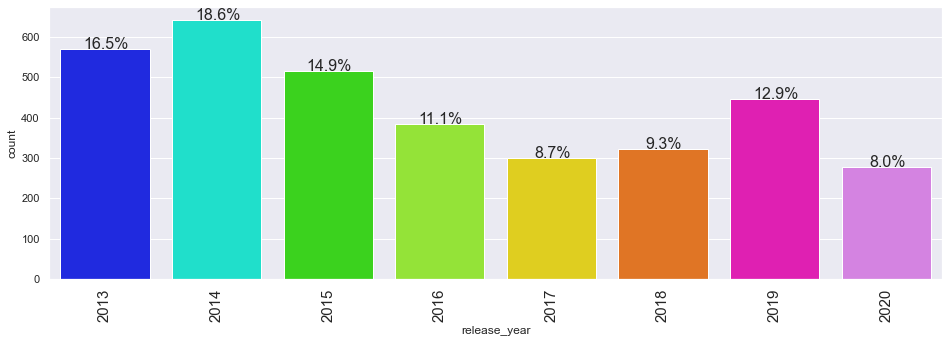

<IPython.core.display.Javascript object>

In [54]:
## Creating a labeled_barplot for the 'release_year' variable
labeled_barplot(df1, "release_year", perc=True, n=15)

#### Observations:
* The most of the devices within the dataset were released in 2013 (16.5%), 2014(18.6%), 2015(14.9%), and (12.9%).
* This variable will be dropped as it is a temporal variable.

## Bivariate Analysis

In [55]:
# correlation of all attributes with used_price
# With this we can begin to look at some relationships between variables that we have to pay special attention to.
df1[df1.columns[:]].corr()["used_price"][:]

screen_size         0.529275
main_camera_mp      0.459209
selfie_camera_mp    0.614675
int_memory          0.378347
ram                 0.529434
battery             0.549647
weight              0.357983
release_year        0.494910
days_used          -0.385777
new_price           0.809335
used_price          1.000000
used_price_log      0.894738
new_price_log       0.775425
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

In [56]:
# Lets remove the temporal variable "release_year"
# Plotting numerical varaibles
cols_to_plot = df1.select_dtypes(include=np.number).columns.tolist()
cols_to_plot.remove("release_year")

<IPython.core.display.Javascript object>

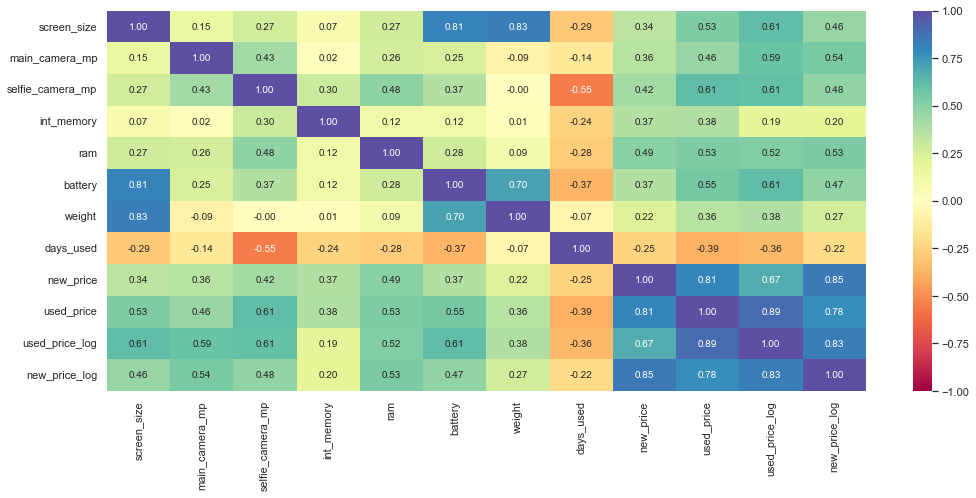

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(17, 7))
sns.heatmap(
    df1[cols_to_plot].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
* From this table we can establish the strongest correlations between the variables according to Pearson's coefficient and get an idea of the possible existence of collinearity.
  * screen_size vs battery = + 0.81
  * screen_size vs weight = + 0.83
  * main_camera_mp vs used_price = + 0.46
  * main_camera_mp vs used_price_log = + 0.59
  * main_camera_mp vs new_price_log = + 0.54
  * selfie_camera_mp vs used_price = + 0.61
  * selfie_camera_mp vs days_used = - 0.55
  * ram vs new_price = + 0.49
  * ram vs used_price = + 0.53
  * battery vs weight = + 0.70
  * new_price vs used_price = + 0.81
  * used_price vs screen size = + 0.53
  * used_price vs main_camera_mp = + 0.46
  * used_price vs selfie_camera_mp = + 0.61
  * used_price vs battery = + 0.55

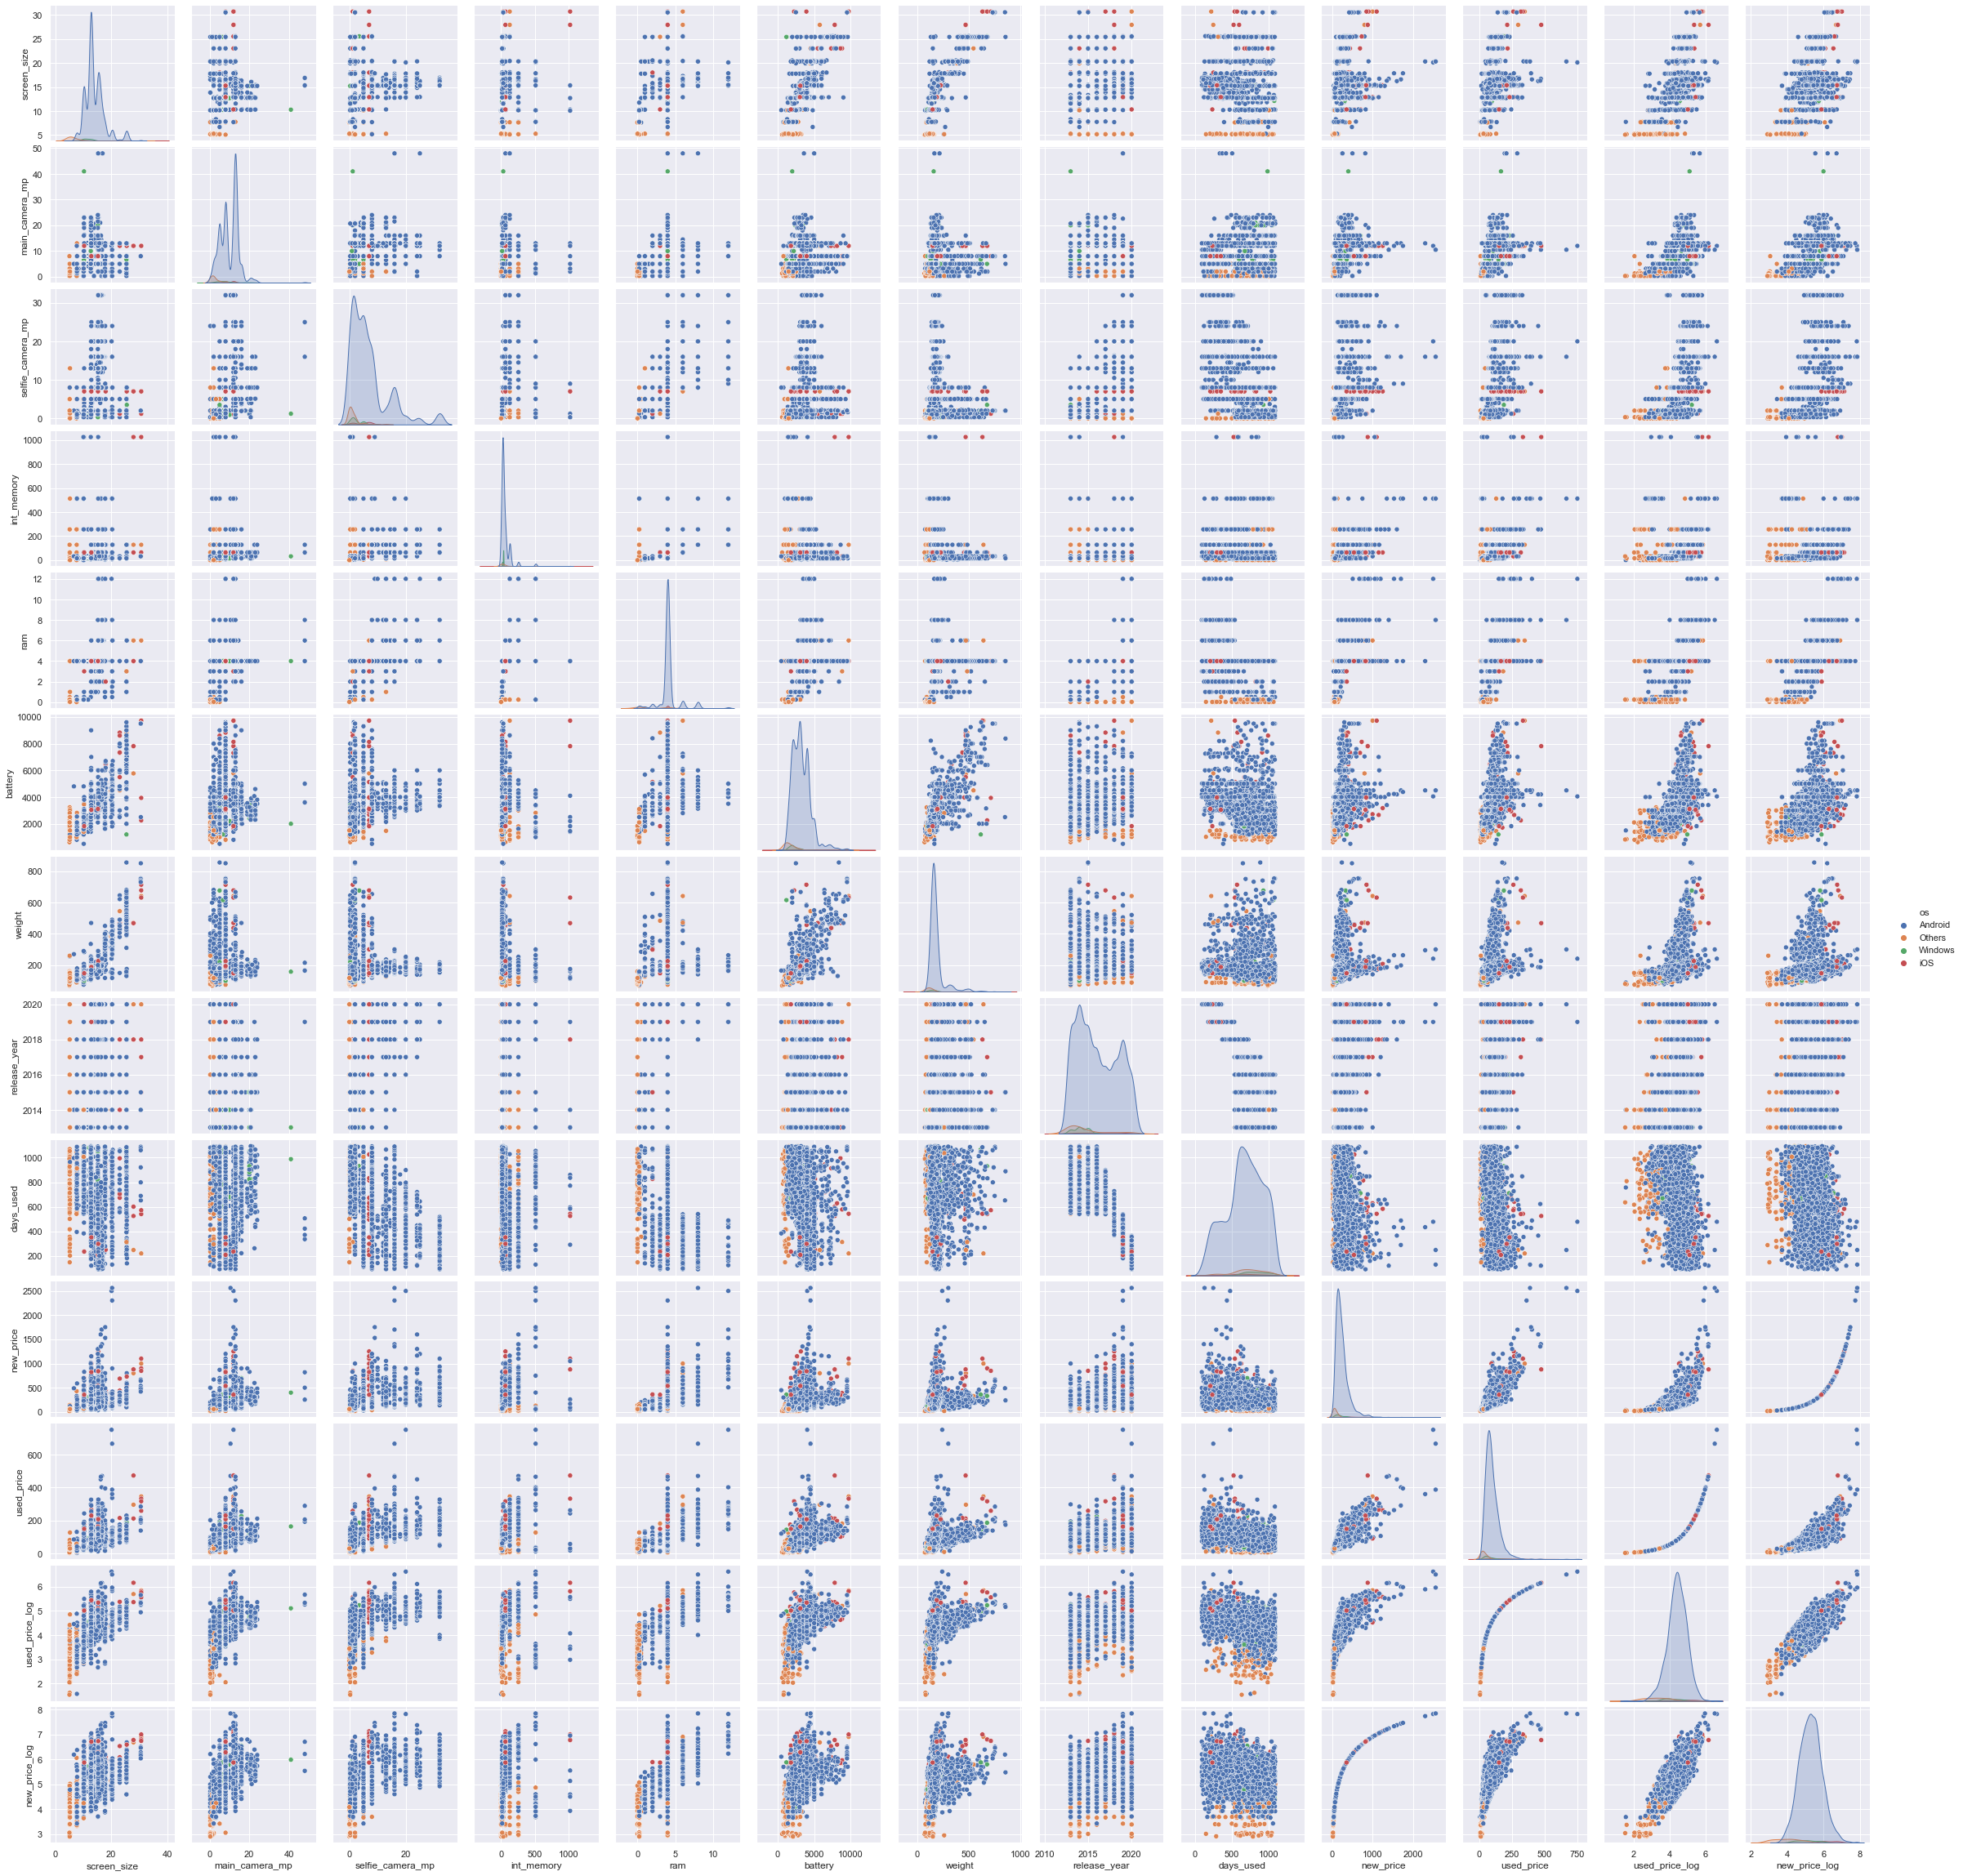

<IPython.core.display.Javascript object>

In [58]:
# Plotting the pairplot graph to identify on the graph the most interesting correlations and validate from the previuos process
sns.pairplot(df1, diag_kind="kde", hue="os")

### Plotting individually the strongest correlation beetween variables

<AxesSubplot:xlabel='screen_size', ylabel='battery'>

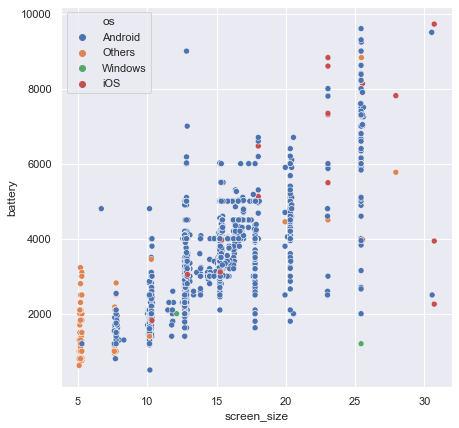

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="screen_size", y="battery", data=df1, hue="os")

#### Observations:
* screen_size vs battery = + 0.81 
* The correlation is positive indicating that both variables are directly proportional, that is to say that as one increases the other also does it and vice versa.
* The vertical linear pattern that is observed is due to the fact that the screen size data is discrete.
* As previously mentioned, the operating system that has the highest percentage of samples within the dataset is Android, highlighted in blue in the graph.

<AxesSubplot:xlabel='screen_size', ylabel='weight'>

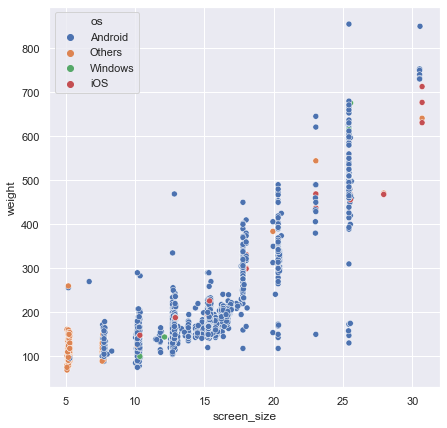

<IPython.core.display.Javascript object>

In [60]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="screen_size", y="weight", data=df1, hue="os")

#### Observations:
* screen_size vs weight = + 0.83 
* The correlation is positive indicating that both variables are directly proportional, that is to say that as one increases the other also does it and vice versa.
* The vertical linear pattern that is observed is due to the fact that the screen size data is discrete.
* As previously mentioned, the operating system that has the highest percentage of samples within the dataset is Android, highlighted in blue in the graph.
* It is quite logical that as the screen size increases, the weight of the device will increase.

<AxesSubplot:xlabel='weight', ylabel='battery'>

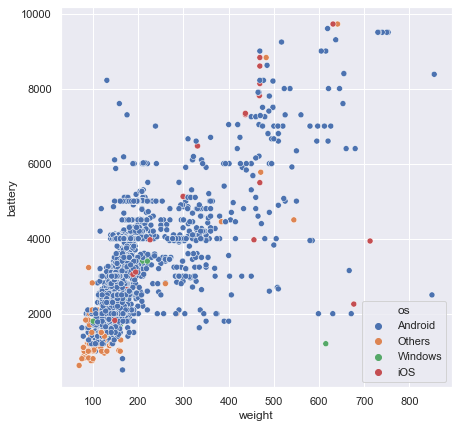

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="weight", y="battery", data=df1, hue="os")

#### Observations:
* weight vs battery = + 0.70 
* The correlation is positive indicating that both variables are directly proportional, that is to say that as one increases the other also does it and vice versa.
* Both numerical variables are continuos so the linear vertical pattern is not observed.
* The lower points in yellow corresponds to the "Others" Operating systems.
* It is quite logical that as the battery capacity increases, the weight of the device will increase.

<AxesSubplot:xlabel='new_price', ylabel='used_price'>

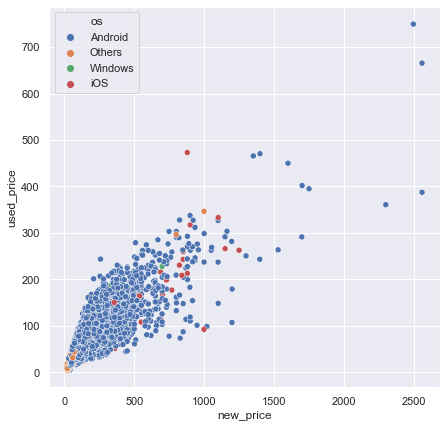

<IPython.core.display.Javascript object>

In [62]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="new_price", y="used_price", data=df1, hue="os")

#### Observations:
* new_price vs used_price = + 0.81 
* The correlation is positive indicating that both variables are directly proportional, that is to say that as one increases the other also does it and vice versa.
* The most of the points are clustered towards the origin of the graph .
* The lower points in yellow corresponds to the "Others" Operating systems.
* In real life, if the initial price of the equipment is high, it will tend to have a used price that is also high, which is quite logical if we consider the behavior of the market of which we are a part.

<AxesSubplot:xlabel='ram', ylabel='new_price'>

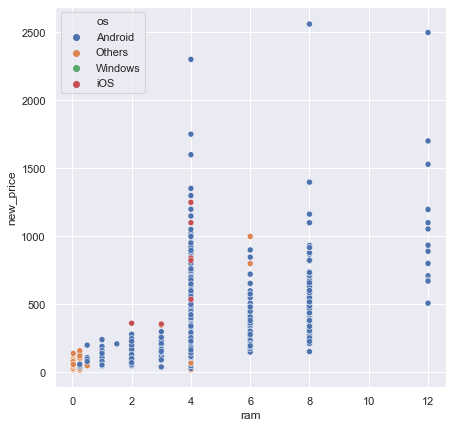

<IPython.core.display.Javascript object>

In [63]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="ram", y="new_price", data=df1, hue="os")

#### Observations:
* ram vs new_price = + 0.49 
* The correlation is positive indicating that both variables are directly proportional, that is to say that as one increases the other also does it and vice versa. However, the ram column data is discrete and produces these vertical alignments, which is why we see the highest concentration of points every two ram units mostly.
* The highest concentration of points occurs for devices with 4, 6, and 8 ram.
* The general trend is that as ram memory increases, the price of both new and used devices will increase.

<AxesSubplot:xlabel='ram', ylabel='used_price'>

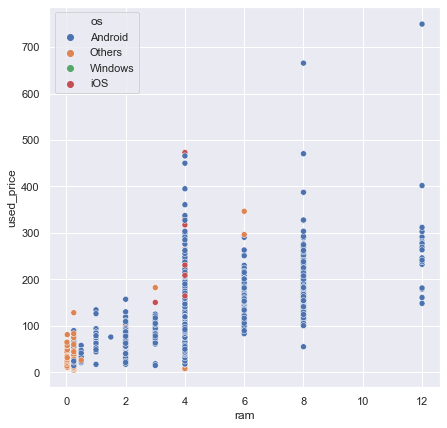

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="ram", y="used_price", data=df1, hue="os")

#### Observations:
* ram vs used_price = + 0.53 
* The correlation is positive indicating that both variables are directly proportional, that is to say that as one increases the other also does it and vice versa. However, the ram column data is discrete and produces these vertical alignments, which is why we see the highest concentration of points every two ram units mostly.
* The highest concentration of points occurs for devices with 4, 6, and 8 ram.
* The general trend is that as ram memory increases, the price of both used and new devices will increase.

<AxesSubplot:xlabel='main_camera_mp', ylabel='used_price'>

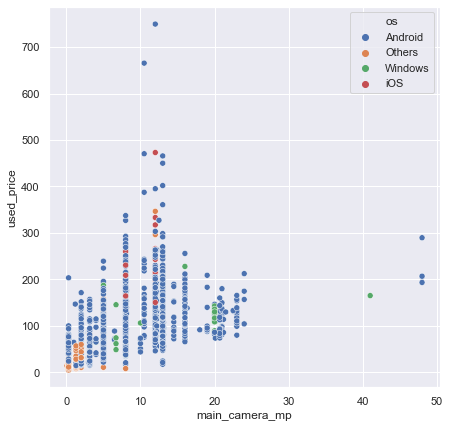

<IPython.core.display.Javascript object>

In [65]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="main_camera_mp", y="used_price", data=df1, hue="os")

#### Observations:
* main_camera_mp vs used_price = + 0.46
* The correlation is positive indicating that both variables are directly proportional, that is to say that as one increases the other also does it and vice versa. However, the ram column data is discrete and produces these vertical alignments.
* The general trend is that as main camera megapixels memory increases, the price of both used and new devices will increase.

<AxesSubplot:xlabel='main_camera_mp', ylabel='used_price'>

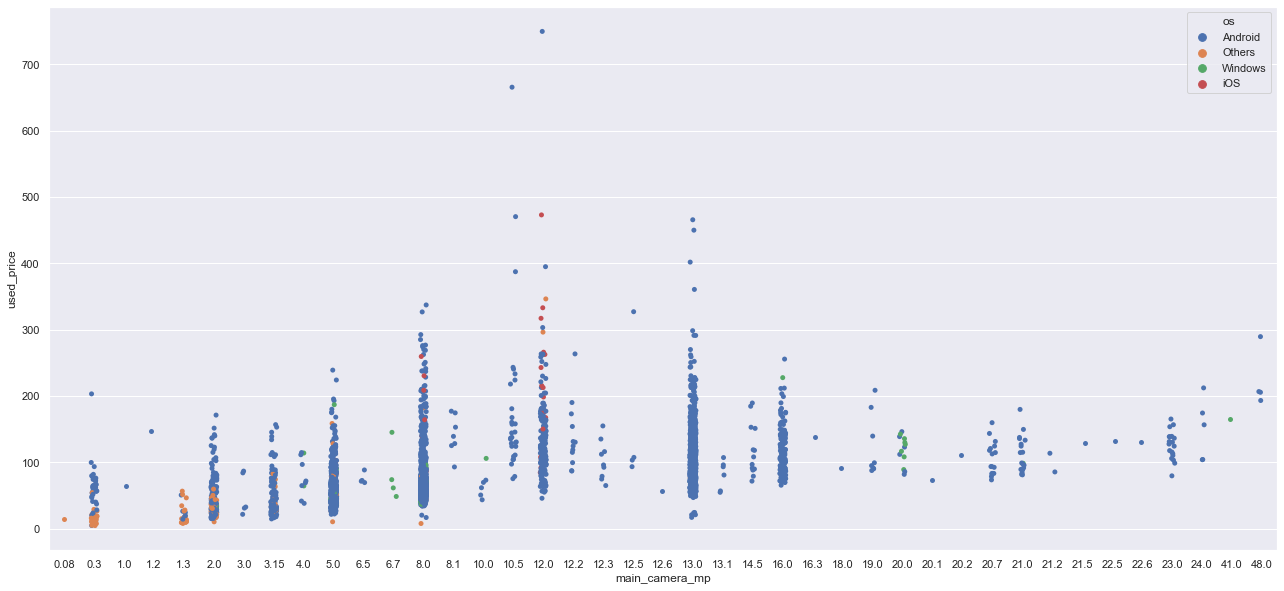

<IPython.core.display.Javascript object>

In [66]:
plt.figure(figsize=(22, 10))
sns.stripplot(data=df1, x="main_camera_mp", y="used_price", jitter=True, hue="os")

#### Observations:
* Same plot than the previous one but with a higher values resolution. 
* The highest concentration of points occurs for devices with 2, 5, 12, 13 and 16 Megapixels.

<AxesSubplot:xlabel='selfie_camera_mp', ylabel='used_price'>

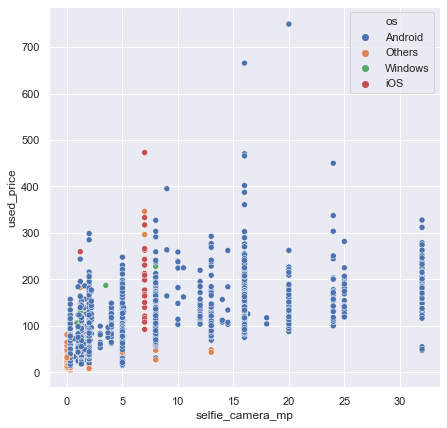

<IPython.core.display.Javascript object>

In [67]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="selfie_camera_mp", y="used_price", data=df1, hue="os")

#### Observations:
* selfie_camera_mp vs used_price = + 0.61
* The correlation is positive indicating that both variables are directly proportional, that is to say that as one increases the other also does it and vice versa. However, the selfie camera megapixels column data is discrete and produces these vertical alignments.
* The general trend is that as selfie camera megapixels increases, the price of both used and new devices will increase.

<AxesSubplot:xlabel='selfie_camera_mp', ylabel='used_price'>

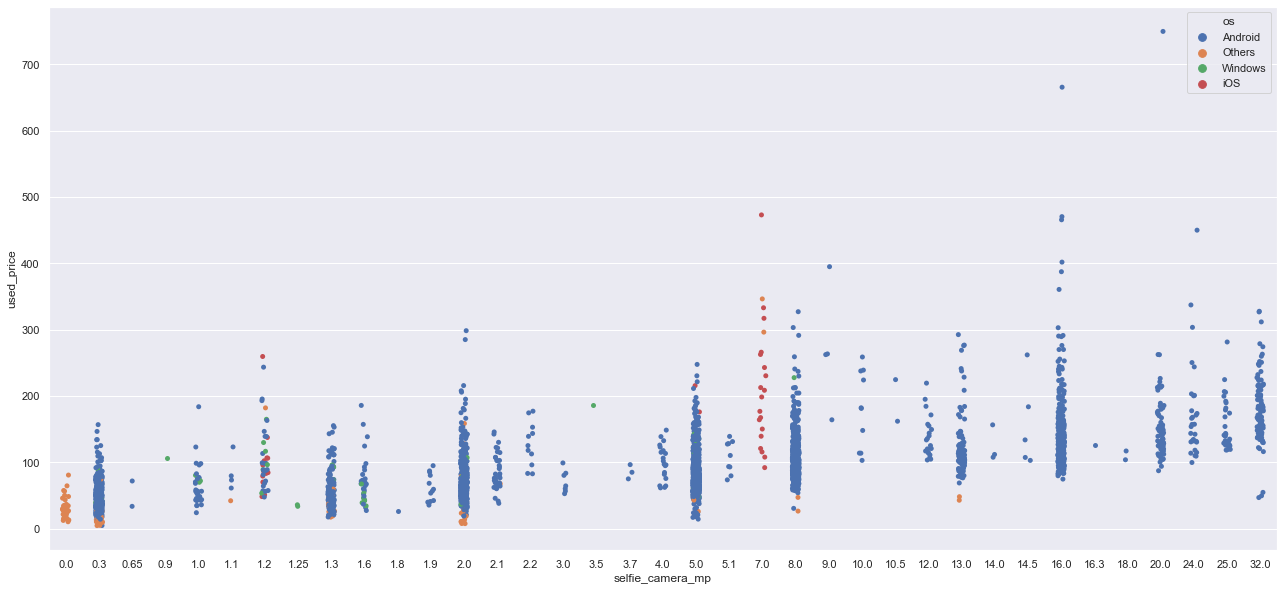

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize=(22, 10))
sns.stripplot(data=df1, x="selfie_camera_mp", y="used_price", jitter=True, hue="os")

#### Observations:
* Same plot than the previous one but with a higher values resolution. 
* The highest concentration of points occurs for devices with 2, 5, 8, 13, 16, 20, 32 Megapixels.
* It is quite logical that in a world governed by social networks and the appearance people are willing to pay more money as the megapixels of device cameras increase, both for new and used devices.

<AxesSubplot:xlabel='release_year', ylabel='selfie_camera_mp'>

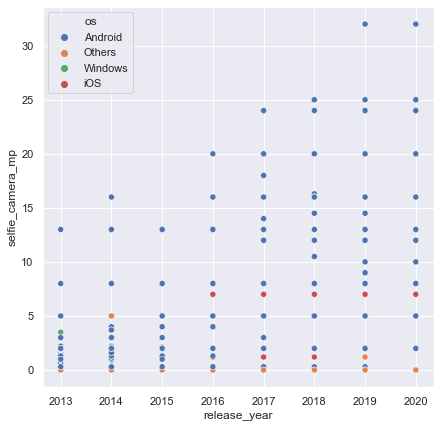

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="release_year", y="selfie_camera_mp", data=df1, hue="os")

#### Observations:
* In this graph we can see how the trend suggests that the manufacturers of the devices have progressively increased or improved the megapixel capacity of the selfie cameras.
* This sounds quite logical, since in the dynamics of today's society, the use of the selfie camera is relevant.

<AxesSubplot:xlabel='release_year', ylabel='main_camera_mp'>

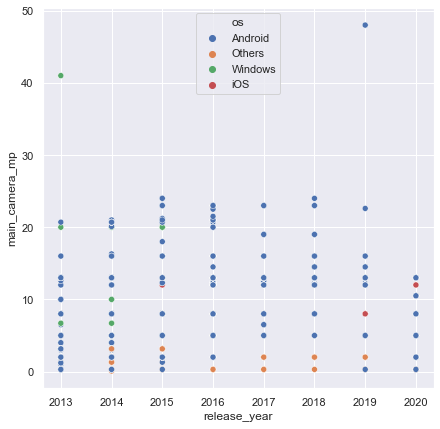

<IPython.core.display.Javascript object>

In [70]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="release_year", y="main_camera_mp", data=df1, hue="os")

#### Observations:
* in this case we see the opposite effect to the previous graph. The capacity in Megapixels of the main camera has remained almost constant since 2013 with an evident decrease in 2020

### The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

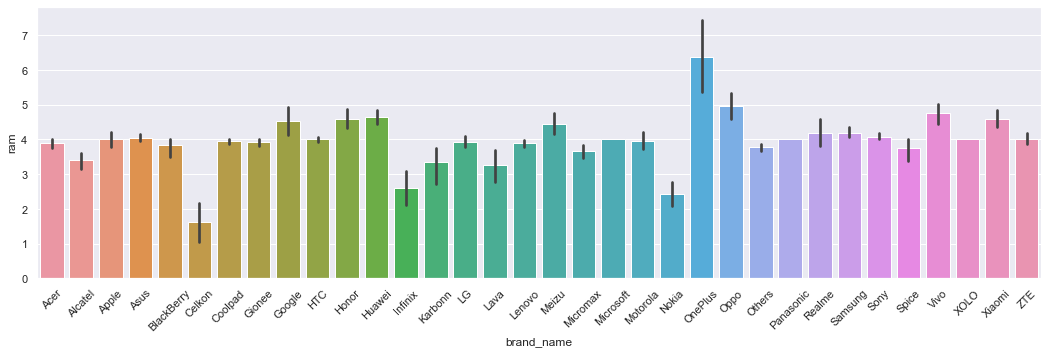

<IPython.core.display.Javascript object>

In [71]:
plt.figure(figsize=(18, 5))
sns.barplot(data=df1, x="brand_name", y="ram")
plt.xticks(rotation=45)
plt.show()

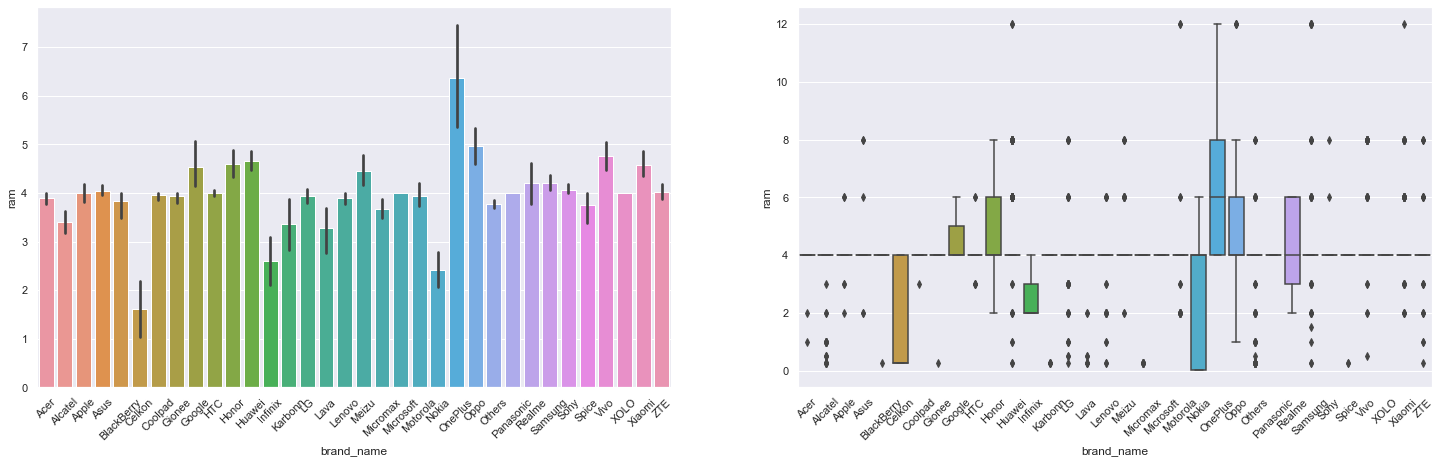

<IPython.core.display.Javascript object>

In [72]:
plt.figure(figsize=(25, 7))

plt.subplot(1, 2, 1)
sns.barplot(data=df1, y="ram", x="brand_name")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, y="ram", x="brand_name")
plt.xticks(rotation=45)

plt.show()

#### Observations:
* In most companies, the variance is small and the quantiles, the average and the median overlap, adjusting around 4 GB of RAM, presenting some outliers.
* The companies with the highest variances are Oneplus and Blackberry. The maximum value corresponds to Oneplus as well.

### A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [73]:
# We can create a dataset to filter the devices which meet the condition > 4500 mAh
df_battery_4500 = df1[df1["battery"] > 4500]
df_battery_4500.head(10)

brand_name       os  screen_size   4g   5g  main_camera_mp  \
3       Honor  Android        25.50  yes  yes            13.0   
4       Honor  Android        15.32  yes   no            13.0   
11      Honor  Android        15.32  yes   no            13.0   
19      Honor  Android        25.43  yes   no             5.0   
20      Honor  Android        20.32  yes   no             8.0   
21     Others  Android        20.32   no   no             8.0   
31     Huawei  Android        20.32  yes   no             5.0   
33     Huawei  Android        25.50  yes   no             8.0   
36     Huawei  Android        25.60  yes  yes            13.0   
40     Huawei  Android        25.60  yes   no            13.0   

    selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3                8.0        64.0  6.0   7250.0   480.0          2020   
4                8.0        64.0  3.0   5000.0   185.0          2020   
11               8.0        64.0  4.0   5000.0   185.0          2020   
19               2.0        32.0  3.0   5100.0   173.0          2019   
20               8.0        32.0  3.0   5100.0   173.0          2019   
21               0.3        16.0  1.0   5680.0   453.6          2013   
31               2.0        16.0  2.0   5100.0   310.0          2020   
33               8.0        64.0  4.0   7250.0   450.0          2020   
36               8.0       128.0  6.0   7250.0   460.0          2020   
40               8.0       128.0  6.0   7250.0   460.0          2019   

    days_used  new_price  used_price  used_price_log  new_price_log  
3         345     278.93      169.93        5.135387       5.630961  
4         293     140.87       80.64        4.389995       4.947837  
11        344     117.94      105.36        4.657383       4.770176  
19        266     248.90       71.37        4.267878       5.517051  
20        321     201.14       95.23        4.556295       5.304001  
21        933     240.90       85.81        4.452136       5.484382  
31        231      99.31       64.75        4.170534       4.598246  
33        211     249.33      169.54        5.133089       5.518777  
36        139     550.23      178.12        5.182457       6.310336  
40        256     449.11      148.07        4.997685       6.107268

<IPython.core.display.Javascript object>

In [74]:
# Companies with the lower weight mean in their devices
df_battery_4500.groupby("brand_name")["weight"].mean().sort_values(ascending=True)

brand_name
Micromax      118.000000
Spice         158.000000
Panasonic     182.000000
Infinix       193.000000
Oppo          195.000000
ZTE           195.400000
Vivo          195.630769
Realme        196.833333
Motorola      200.757143
Gionee        209.430000
Xiaomi        231.500000
Honor         248.714286
Asus          313.772727
Nokia         318.000000
Acer          360.000000
LG            366.058333
Alcatel       380.000000
Others        390.546341
Huawei        394.486486
Samsung       398.352000
HTC           425.000000
Sony          439.500000
Apple         439.558824
Lenovo        442.721429
Google        517.000000
BlackBerry           NaN
Celkon               NaN
Coolpad              NaN
Karbonn              NaN
Lava                 NaN
Meizu                NaN
Microsoft            NaN
OnePlus              NaN
XOLO                 NaN
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

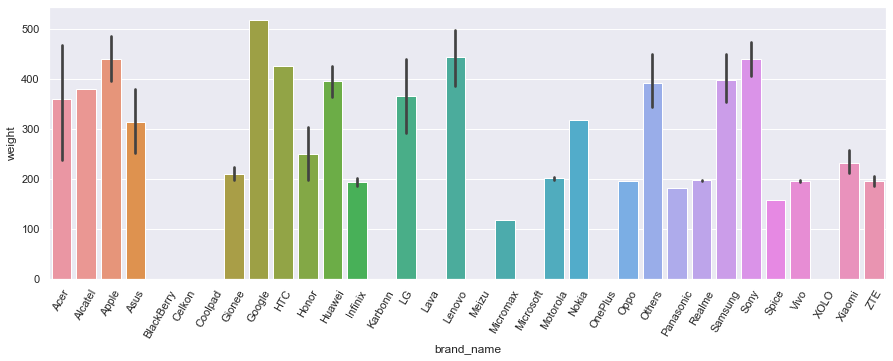

<IPython.core.display.Javascript object>

In [75]:
# Creating a barplot for the variables 'weight' and 'brand_name' with the battery capacity >4500 mAh
plt.figure(figsize=(15, 5))
sns.barplot(data=df_battery_4500, x="brand_name", y="weight")
plt.xticks(rotation=60)
plt.show()

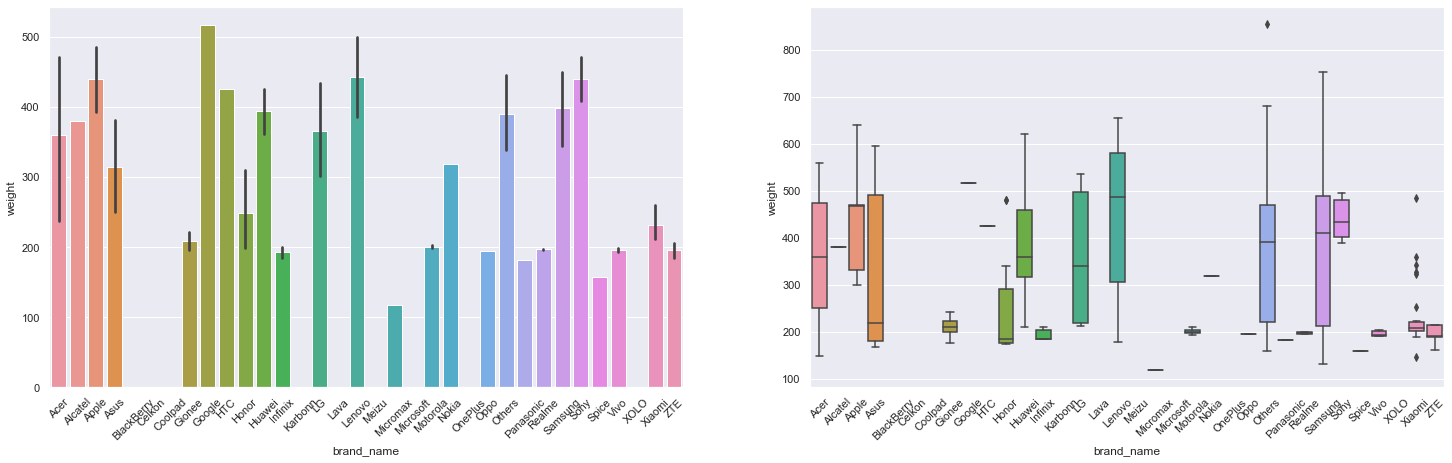

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(25, 7))

plt.subplot(1, 2, 1)
sns.barplot(data=df_battery_4500, y="weight", x="brand_name")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_battery_4500, y="weight", x="brand_name")
plt.xticks(rotation=45)

plt.show()

#### Observations:
* The dataset for batteries greater than 4500 mAh shows a greater variance in the weight of the devices for companies such as Acer, Asus, Karboon, Levenovo, others and Samsung. In some companies the variance is very small, such as Google, Microsoft, Micromax, Meizu, among others.
* The companies with the highest values in weight within the condition of the >4500 mAh are Samsung and others. Few outliers are observed.

### Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [77]:
# Creating the dataset with the screen size over 6 inches. As we have our units in centimeres we need to multiply by 2.54 the value in inches
df_screen_6in = df1[df1.screen_size > 15.24]
df_screen_6in.shape

(1099, 17)

<IPython.core.display.Javascript object>

In [78]:
# Companies with the highest number of devices with the screen greater than 6 inches(15.24cm)
df_screen_6in.brand_name.value_counts()

Huawei        149
Samsung       119
Others         99
Vivo           80
Honor          72
Oppo           70
Lenovo         69
Xiaomi         69
LG             59
Motorola       42
Asus           41
Realme         40
Alcatel        26
Apple          24
Acer           19
Meizu          17
ZTE            17
OnePlus        16
Nokia          15
Sony           12
Infinix        10
Micromax        7
HTC             7
Google          4
XOLO            3
Gionee          3
Coolpad         3
Spice           2
Panasonic       2
Karbonn         2
Microsoft       1
Celkon          0
BlackBerry      0
Lava            0
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

In [79]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = df_screen_6in[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 10))
    else:
        plt.figure(figsize=(n + 2, 10))

    plt.xticks(rotation=90, fontsize=20)
    ax = sns.countplot(
        data=df_screen_6in,
        x=feature,
        palette="gist_ncar",
        order=df_screen_6in[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=16,
            xytext=(1, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

<Figure size 1440x1080 with 0 Axes>

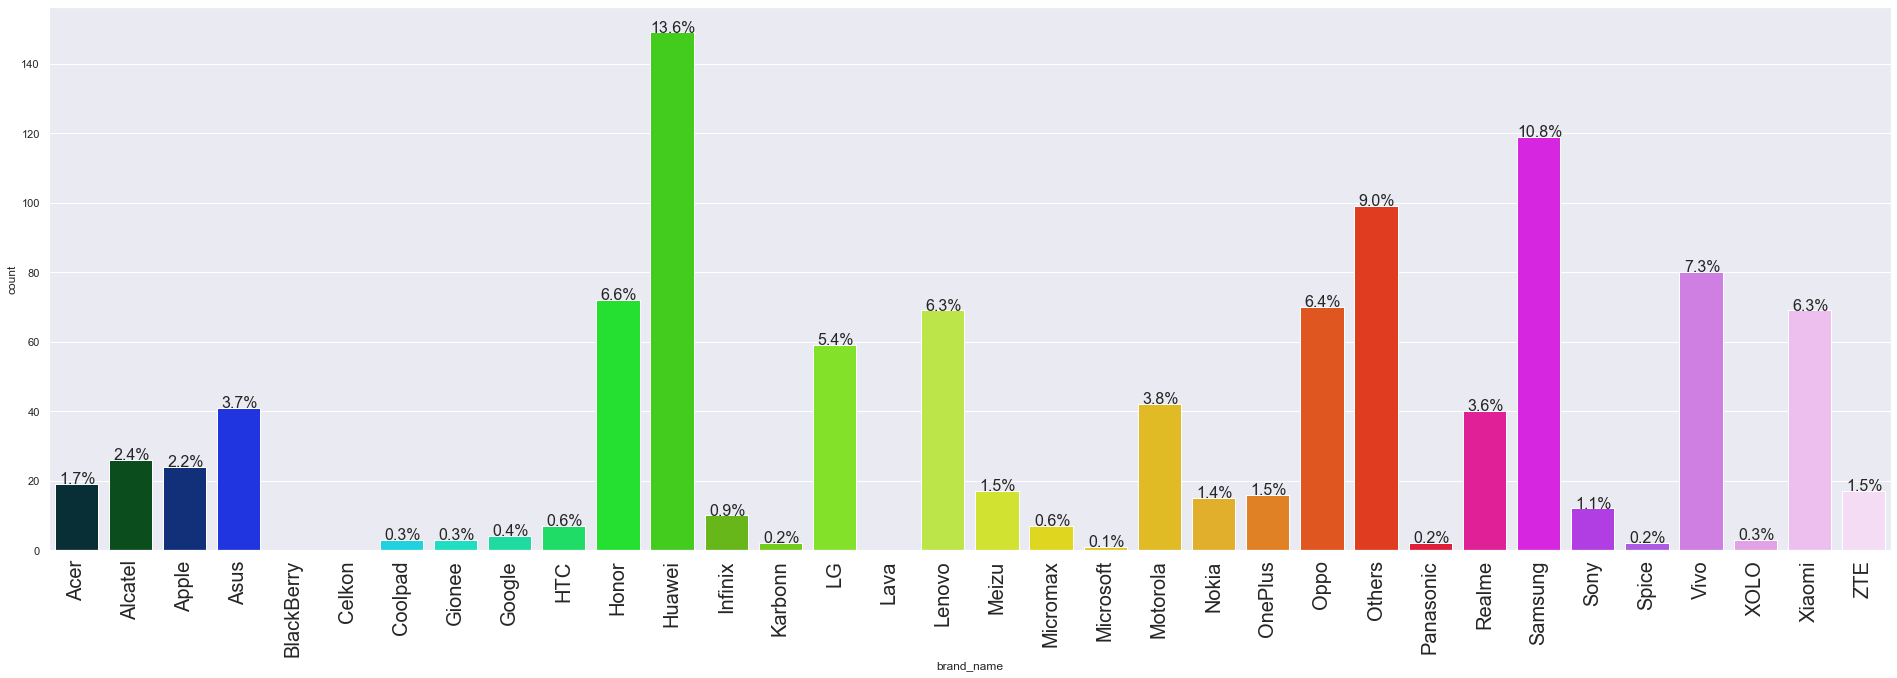

<IPython.core.display.Javascript object>

In [80]:
## Creating the labeled_barplot for screens larger than 6 inches(15.24 cm) according to the different brand names
plt.figure(figsize=(20, 15))
labeled_barplot(
    df_screen_6in,
    "brand_name",
    perc=True,
)

#### Observations:
* The graph shows the percentage weight of devices with screens greater than 6 inches according to the brand name.
* The top five is the following:
 * 1.- Huawei 13.6% (149)
   2.- Samsung 10.8% (119)
   3.- Others  9%    (99)
   4.- Vivo 7.3% (80)
   5.- Honor 6.6% (72)

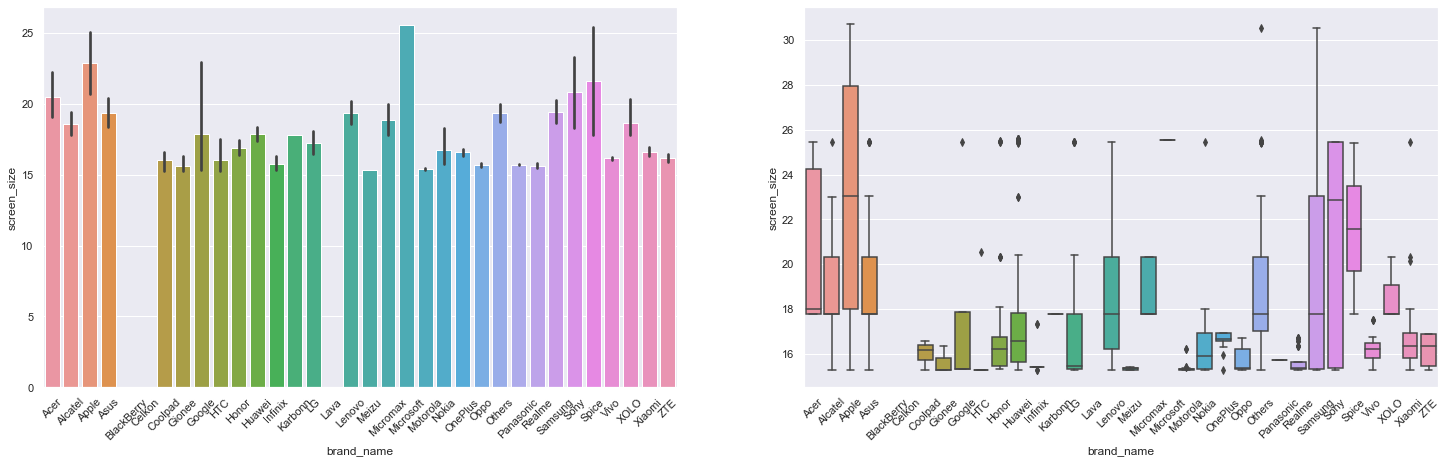

<IPython.core.display.Javascript object>

In [81]:
plt.figure(figsize=(25, 7))

plt.subplot(1, 2, 1)
sns.barplot(data=df_screen_6in, y="screen_size", x="brand_name")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_screen_6in, y="screen_size", x="brand_name")
plt.xticks(rotation=45)

plt.show()

#### Observations:
* The dataset for screen sizes greater than 6 inches shows a greater variance of the devices for companies such as Spice and  Sony. In some companies the variance is very small.
* The companies with the highest values in screen size within the condition of the >6 inches are Apple and Others. some outliers are observed.

### Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?

In [82]:
# Creating the dataset with the selfie camera where the resolution is greater than 8 Megapixels
df_selcamera_8mp = df1[df1.selfie_camera_mp > 8]
df_selcamera_8mp.shape

(655, 17)

<IPython.core.display.Javascript object>

In [83]:
# Companies with the highest number of selfie cameras greater than 8 megapixels of resolution
df_selcamera_8mp.brand_name.value_counts()

Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
ZTE           20
HTC           20
Realme        18
OnePlus       18
Sony          14
Lenovo        14
Nokia         10
Asus           6
Gionee         4
Infinix        4
Coolpad        3
Micromax       2
Panasonic      2
BlackBerry     2
Acer           1
Apple          0
XOLO           0
Spice          0
Google         0
Karbonn        0
Lava           0
Microsoft      0
Alcatel        0
Celkon         0
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

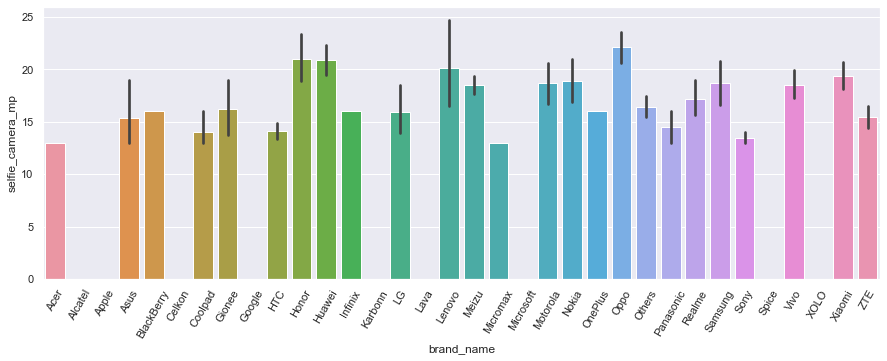

<IPython.core.display.Javascript object>

In [84]:
## Creating the labeled_barplot for selfie cameras larger than 8 megapixels resolution according to the different brand names
plt.figure(figsize=(15, 5))
sns.barplot(data=df_selcamera_8mp, x="brand_name", y="selfie_camera_mp")
plt.xticks(rotation=60)
plt.show()

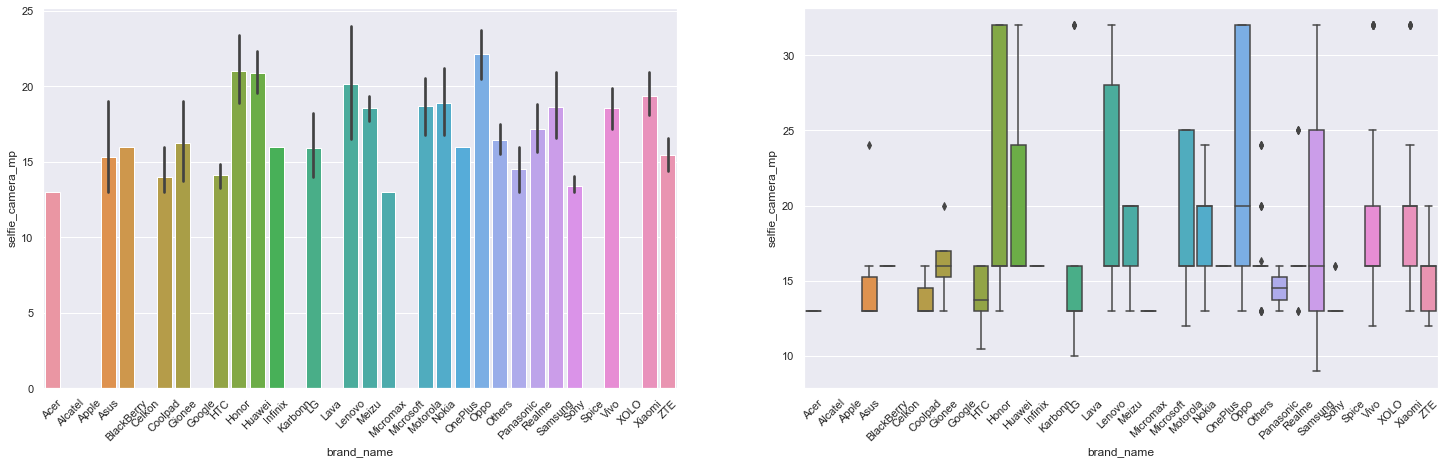

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(25, 7))

plt.subplot(1, 2, 1)
sns.barplot(data=df_selcamera_8mp, y="selfie_camera_mp", x="brand_name")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_selcamera_8mp, y="selfie_camera_mp", x="brand_name")
plt.xticks(rotation=45)

plt.show()

#### Observations:
* The dataset for selfie cameras with megapixels greater than 8 Mp shows a greater variance of the data for companies such as Lava, Apple, Coolpad, Samsung, Microsoft and Motorola. In some companies the variance is very small like Acer, Asus, Onplues, among others.
* The companies with the highest values in Megapixels for the selfies camera are Samsung, Honor, HTC and Lava. some outliers are observed for some of the companies.

### Since the dependent variable we want to predict is used_price, it is useful to identify its behavior over time

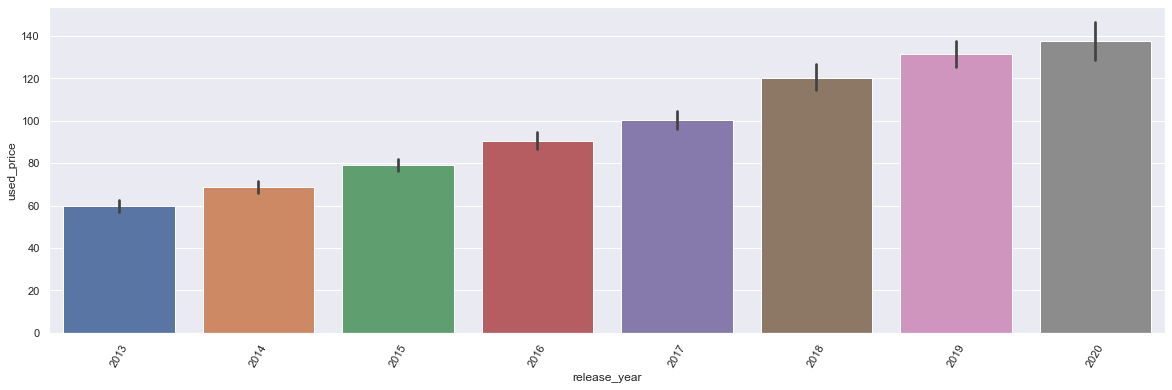

<IPython.core.display.Javascript object>

In [86]:
## Creating a barplot to evaluate the behavior of the 'used_price' over the time ('release_year')
plt.figure(figsize=(20, 6))
sns.barplot(data=df1, x="release_year", y="used_price")
plt.xticks(rotation=60)
plt.show()

#### Observations:
* The behavior of the price used with respect to the timeline is ascending. The variation in the data has remained almost constant in the evaluated time window.

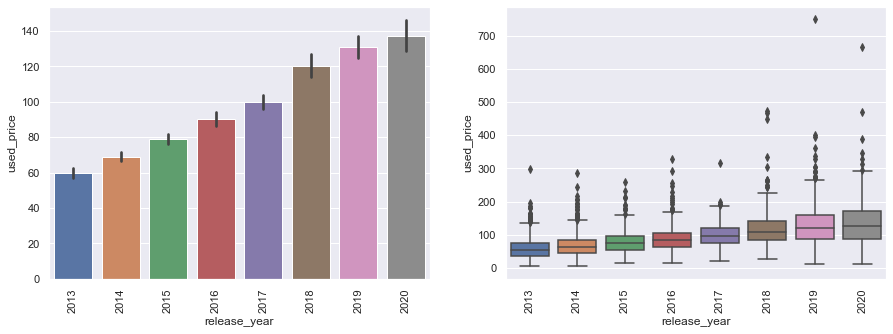

<IPython.core.display.Javascript object>

In [87]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df1, y="used_price", x="release_year")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, y="used_price", x="release_year")
plt.xticks(rotation=90)

plt.show()

#### Observations:
* The variation in the data has remained almost constant in the evaluated time window, increasing a little since 2017, as well as the maximum and outlier values. The mean has been increasing constantly over the years as well.

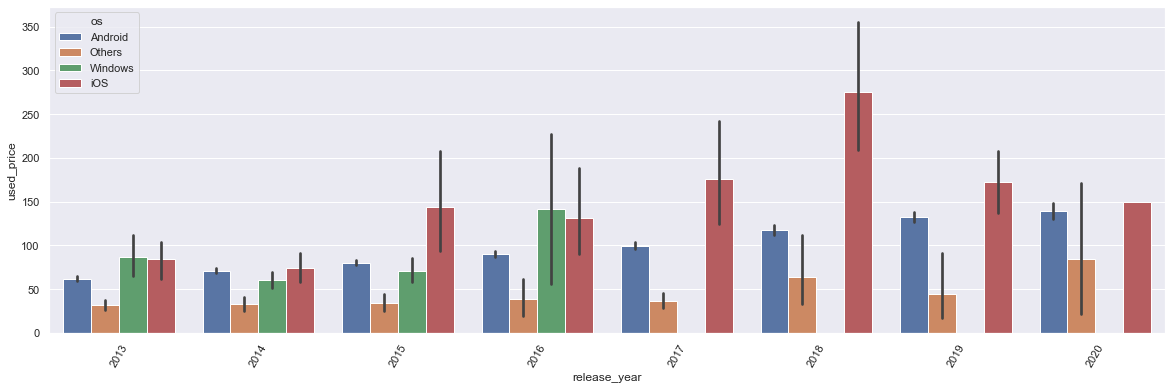

<IPython.core.display.Javascript object>

In [88]:
## Creating a barplot to evaluate the behavior of the 'used_price' over the time ('release_year') separated by Operating System
plt.figure(figsize=(20, 6))
sns.barplot(data=df1, x="release_year", y="used_price", hue="os")
plt.xticks(rotation=60)
plt.show()

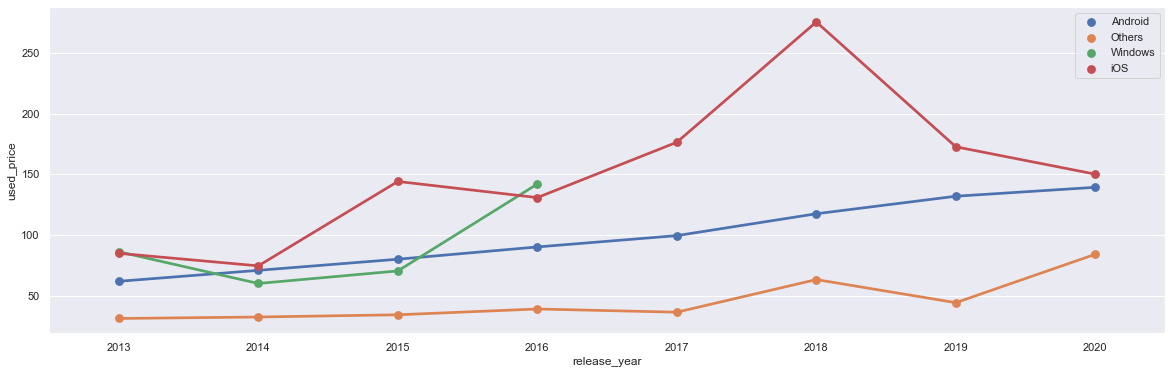

<IPython.core.display.Javascript object>

In [89]:
plt.figure(figsize=(20, 6))  # To resize the plot
sns.pointplot(
    x="release_year", y="used_price", data=df1, estimator=np.mean, ci=None, hue="os"
)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)  # To rotate the x axis labls
plt.show()

#### Observations:
* Visualizing the variation in the price of used devices separated by operating system, we observe that all have had an upward trend in general, except for apple, whose price has fallen since 2018. This is possibly due to the fact that it has lost market with Android. However, the number of samples with the iOS operating system would have to be increased, since in this android dataset it represents 93% of the data.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Feature engineering

* Lets create categories based on the price range of the devices in the used_price and new_price variables since these variables have a strong correlation.
* We will take into consideration the conditions established above:
 * Selfie_camera_mp > 8 Megapixels
 * Battery Capacity > 4500 mAh
 * Screen size > 6 inches (15.24 cm)

In [130]:
# We can create categories according to the ranges of the price for the used devices in order to stablish a proper pricing strategy or an acceptable range of price
df_selcamera_8mp["cat_range"] = pd.cut(
    x=df1.used_price,
    bins=[-np.infty, 100, 250, np.infty],
    labels=["Low_Cost", "Average_cost", "High_cost"],
)
# based on the statistical information of the variable wh should decide the range  
# 1st quantile = 56 €
# 3rd quantile = 116 €
# mean = 92€
# max = 749€
# min = 4.65€

df_selcamera_8mp["cat_range"].value_counts()


Average_cost    537
Low_Cost         76
High_cost        42
Name: cat_range, dtype: int64

<IPython.core.display.Javascript object>

In [129]:
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

<IPython.core.display.Javascript object>

In [92]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 7))
    else:
        plt.figure(figsize=(n + 2, 7))

    plt.xticks(rotation=0, fontsize=20)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="gist_ncar",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=16,
            xytext=(1, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

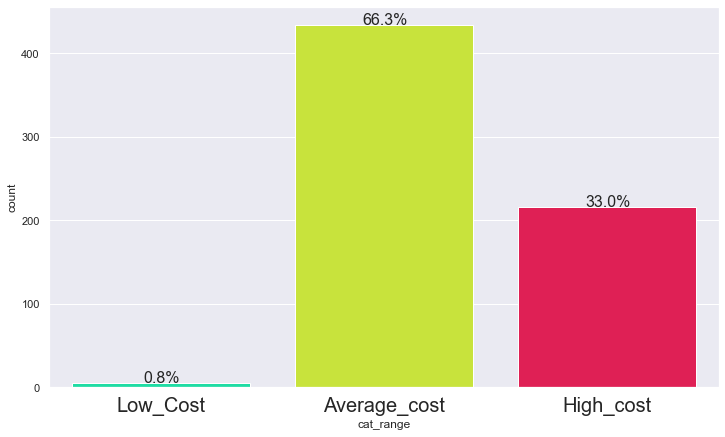

<IPython.core.display.Javascript object>

In [152]:
# Cretaing a labeled_barplot for 'cat_range' for used devices with selfie cameras greater than 8 Megapixels segregated by price categories
labeled_barplot(df_selcamera_8mp, "cat_range", perc=True, n=10)

#### Observations:
* What we consider in this study as Average cost (100€-250€) has the greatest percentage weight with 82% (537) within the devices used with a resolution camera greater than 8 Megapixels.
* With a 11.6%(76) we have the used devices that are below 100€.
* Just the 6.4%(42) of the used devices with selfie cameras with a resolution over the 8 Mp are over 250€.

In [ ]:
# visual analysis of the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(data['converted'], data['landing_page']).plot(kind="bar", figsize=(8,10), stacked=True)
plt.legend()
plt.show()

# stack los barplots

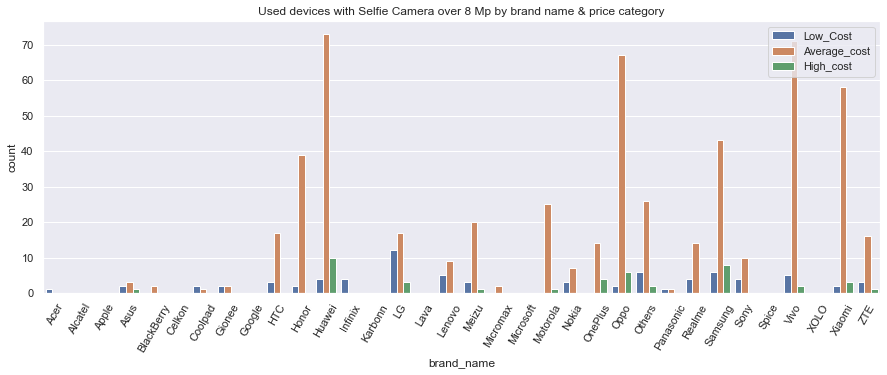

<IPython.core.display.Javascript object>

In [131]:
## Countplot to see by companies how many used devices with selfie camera greater than 8 Mp fall in the different  price category established
plt.figure(figsize=(15, 5))
sns.countplot(x="brand_name", data=df_selcamera_8mp, hue="cat_range")
plt.xticks(rotation=60)
plt.title("Used devices with Selfie Camera over 8 Mp by brand name & price category")
plt.legend(loc=1)
plt.show()

#### Observations:
* Honor is the brand with the most used devices in both Average_cost and High_cost with a selfie camera over 8 Mp. It is followed by Vivo, Oppo, Xaomi and Samsung.
* Karbonn is the brand with the highest number of used devices used in the low_cost category <100€.

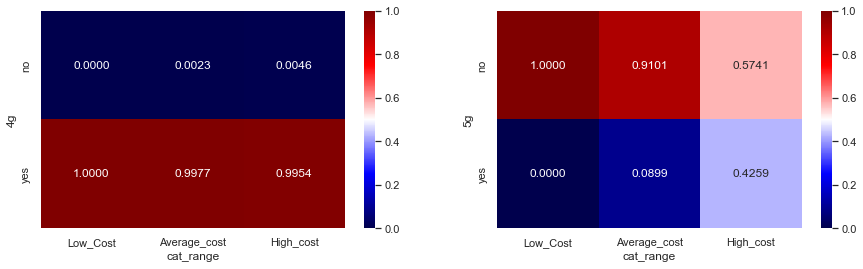

<IPython.core.display.Javascript object>

In [153]:
# Creating a crosstab for 4g & 5g devices splitted by price ranges
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(
        df_selcamera_8mp["4g"], df_selcamera_8mp["cat_range"], normalize="columns"
    ),
    annot=True,
    fmt=".4f",
    cmap="seismic",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(
        df_selcamera_8mp["5g"], df_selcamera_8mp["cat_range"], normalize="columns"
    ),
    annot=True,
    fmt=".4f",
    cmap="seismic",
)

plt.show()

#### Observations:
* Condition: Selfie Camera Resolution > 8 Megapixels for 4g & 5g devices: 
 * 4G= 100% of the low_cost 4G used devices have 4g enabled, 99.6% of the Average_cost has 4g enabled, and the 100% of the High_cost of used devices has 4g enabled.
 * 5G= 1.3 % of the low_cost 5G used devices have 5g enabled, 19.7% of the Average_cost has 5g enabled, and the 57.1% of the High_cost used devices has 5g enabled.

In [151]:
# We can create categories according to the ranges of the price for the used devices in order to stablish a proper pricing strategy
df_screen_6in["cat_range"] = pd.cut(
    x=df_screen_6in.used_price,
    bins=[-np.infty, 100, 250, np.infty],
    labels=["Low_Cost", "Average_cost", "High_cost"],
)

df_screen_6in["cat_range"].value_counts()


Average_cost    674
Low_Cost        374
High_cost        51
Name: cat_range, dtype: int64

<IPython.core.display.Javascript object>

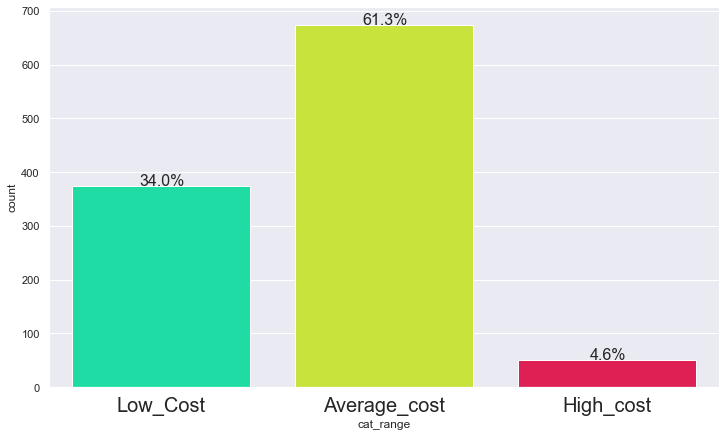

<IPython.core.display.Javascript object>

In [97]:
## Creating the labeled_barplot for new category created according to used price
labeled_barplot(df_screen_6in, "cat_range", perc=True, n=10)

#### Observations:
* What we consider in this study as Average_cost (100€-250€) has the greatest percentage weight with 61% (674) within the used devices with a screen size greater than 6 inches.
* With a 34%(374) we have the used devices that are below 100€ and have a screen size over 6 inches.
* Just the 4.6%(51) of the used devices with screen size greater than 6 inches are over 250€.

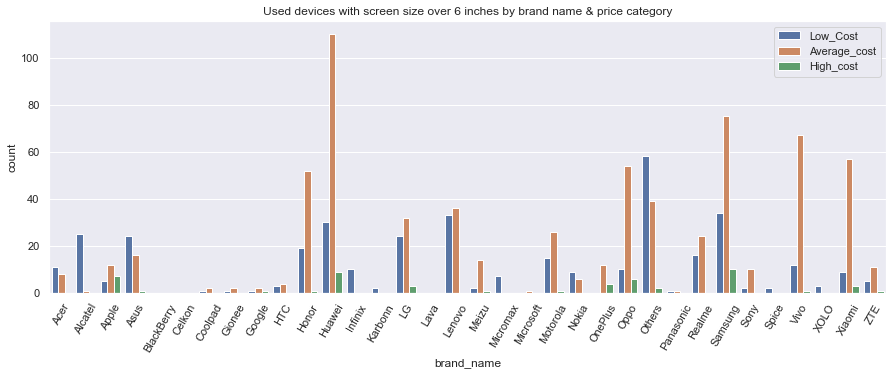

<IPython.core.display.Javascript object>

In [132]:
## Countplot to see by companies how many used devices with screen size greater than 6 inches fall in the different price category established
plt.figure(
    figsize=(15, 5)
)  
sns.countplot(x="brand_name", data=df_screen_6in, hue="cat_range")
plt.xticks(rotation=60)
plt.title("Used devices with screen size over 6 inches by brand name & price category")
plt.legend(loc=1)
plt.show()

#### Observations:
* Honor is the brand with the most used devices in Average_cost with a screen size over 6 inches. It is followed by Samsung, Realme, Spice, and Xaomi.
* Oppo is the brand with the highest number of used devices in the low_cost category <100€ for screen size over 6 inches.
* Realme is the brand with highest number of used devices in the High_cost range >250€.

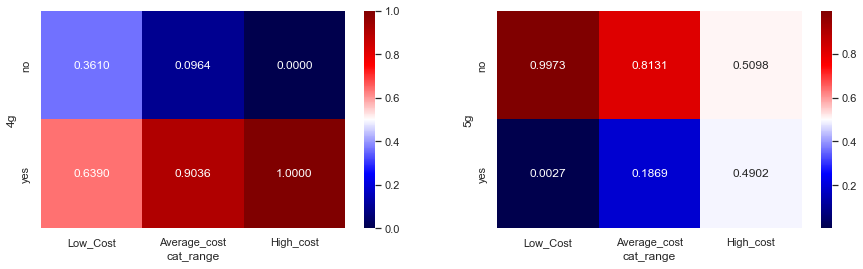

<IPython.core.display.Javascript object>

In [155]:
# Creating a crosstab for 4g & 5g devices splitted by price ranges
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df_screen_6in["4g"], df_screen_6in["cat_range"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="seismic",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(df_screen_6in["5g"], df_screen_6in["cat_range"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="seismic",
)

plt.show()

#### Observations:
* Condition: Screen size > 6 inches for 4g & 5g devices: 
 * 4G= 63% of the low_cost 4G used devices have 4g enabled, 90.03% of the Average_cost has 4g enabled, and the 100% of the High_cost of used devices has 4g enabled.
 * 5G= 0.02 % of the low_cost 5G used devices have 5g enabled, 18.6% of the Average_cost has 5g enabled, and the 49.02% of the High_cost used devices has 5g enabled.

In [100]:
# We can create categories according to the ranges of the price for the used devices in order to stablish a proper pricing strategy
df_battery_4500["cat_range"] = pd.cut(
    x=df_battery_4500.used_price,
    bins=[-np.infty, 100, 250, np.infty],
    labels=["Low_Cost", "Average_cost", "High_cost"],
)

df_battery_4500["cat_range"].value_counts()


Average_cost    227
Low_Cost        102
High_cost        12
Name: cat_range, dtype: int64

<IPython.core.display.Javascript object>

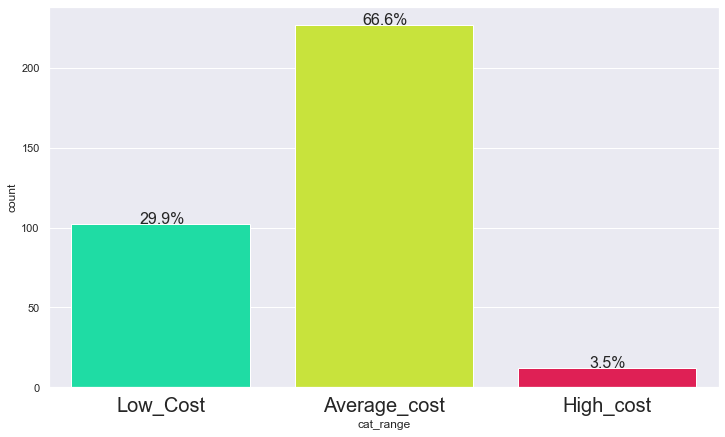

<IPython.core.display.Javascript object>

In [101]:
## Creating the labeled_barplot for new category created according to used price
labeled_barplot(df_battery_4500, "cat_range", perc=True, n=10)

#### Observations:
* What we consider in this study as Average_cost (100€-250€) has the greatest percentage weight with 66.6% (227) within the used devices with a battery capacity over 4500 mAh.
* With a 29.9%(102) we have the used devices that are below 100€ and have a battery capacity over 4500 mAh.
* Just the 3.5%(12) of the used devices with a battery capacity greater than 4500 mAh are over 250€.

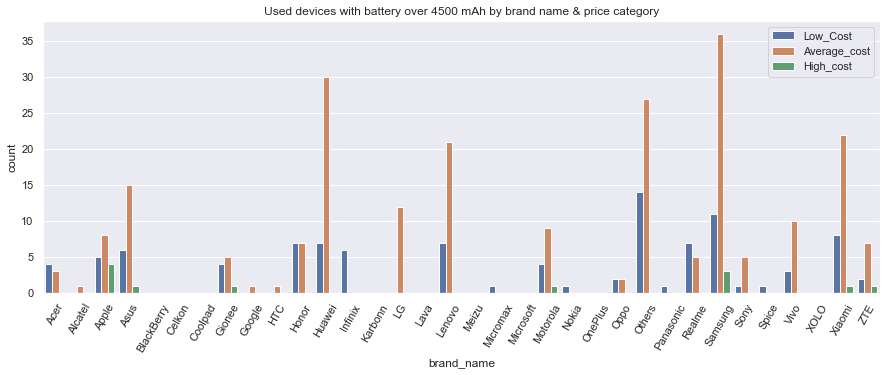

<IPython.core.display.Javascript object>

In [133]:
## Countplot to see by companies how many used devices with battery capacity greater than 4500mAh fall in the different price category established
plt.figure(
    figsize=(15, 5)
) 
sns.countplot(x="brand_name", data=df_battery_4500, hue="cat_range")
plt.xticks(rotation=60)
plt.title("Used devices with battery over 4500 mAh by brand name & price category")
plt.legend(loc=1)
plt.show()

#### Observations:
* Samsung is the brand with the most used devices in Average_cost with a battery capacity over 4500 mAh. It is followed by Honor, Others, Xaomi, and Lenovo.
* Oppo is the brand with the highest number of used devices in the low_cost category <100€ for a battery capacity over 4500 mAh.
* Others is the brand with highest number of used devices in the High_cost range >250€, followed by Samsung.

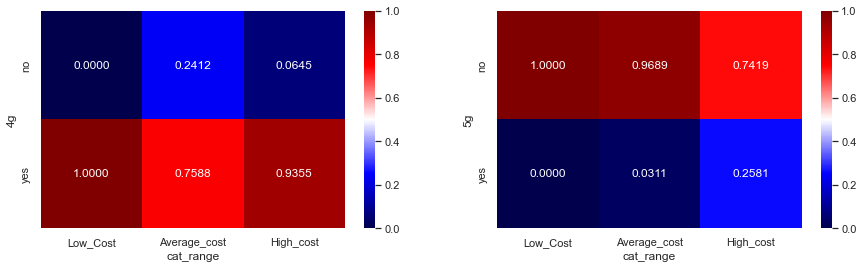

<IPython.core.display.Javascript object>

In [156]:
# Creating a crosstab for 4g & 5g devices splitted by price ranges
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(
        df_battery_4500["4g"], df_battery_4500["cat_range"], normalize="columns"
    ),
    annot=True,
    fmt=".4f",
    cmap="seismic",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(
        df_battery_4500["5g"], df_battery_4500["cat_range"], normalize="columns"
    ),
    annot=True,
    fmt=".4f",
    cmap="seismic",
)

plt.show()

#### Observations:
* Condition: Battery Capacity > 4500 mAh for 4g & 5g devices: 
 * 4G= 80% of the low_cost 4G used devices have 4g enabled, 79.7% of the Average_cost category has 4g enabled, and the 100% of the High_cost of used devices has 4g enabled.
 * 5G= 0 % of the low_cost 5G used devices have 5g enabled, 9% of the Average_cost has 5g enabled, and the 16.6% of the High_cost used devices has 5g enabled.

### new_price

In [137]:
# We can create categories according to the ranges of the price for the used devices in order to stablish a proper pricing strategy or an acceptable range of price
df_selcamera_8mp["cat_range"] = pd.cut(
    x=df1.new_price,
    bins=[-np.infty, 120, 400, np.infty],
    labels=["Low_Cost", "Average_cost", "High_cost"],
)
# based on the statistical information of the variable wh should decide the range  
# 1st quantile = 120.34 €
# 3rd quantile = 291.11 €
# mean = 237€
# max = 2560.20€
# min = 18.20€

df_selcamera_8mp["cat_range"].value_counts()


Average_cost    434
High_cost       216
Low_Cost          5
Name: cat_range, dtype: int64

<IPython.core.display.Javascript object>

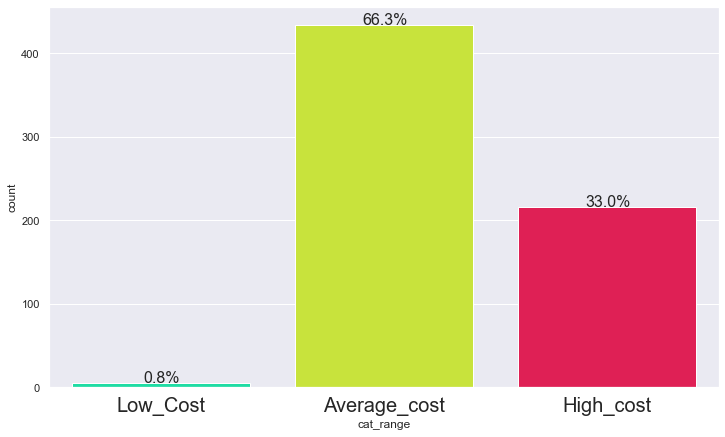

<IPython.core.display.Javascript object>

In [138]:
# Cretaing a labeled_barplot for 'cat_range' for used devices with selfie cameras greater than 8 Megapixels segregated by price categories
labeled_barplot(df_selcamera_8mp, "cat_range", perc=True, n=10)

#### Observations:
* What we consider in this study as Average cost (120€-400€) has the greatest percentage weight with 66.3% (434) within the new devices with a resolution camera greater than 8 Megapixels.
* With a 33%(216) we have the new devices that are above 400€ considered High_cost.
* Just the 0.8%(5) of the new devices with selfie cameras with a resolution over the 8 Mp are under 120€.

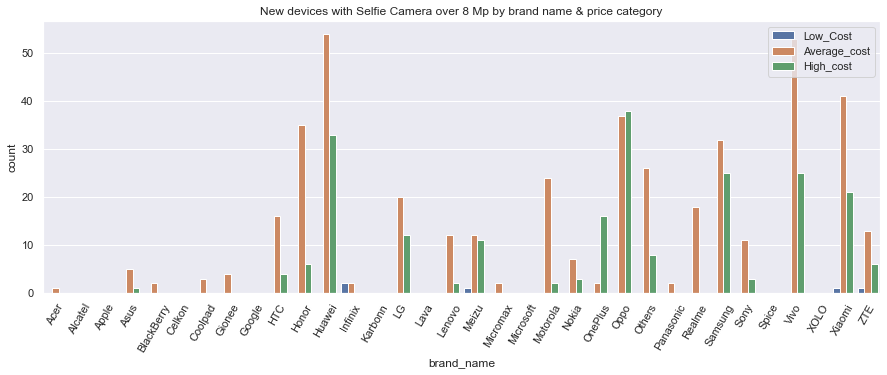

<IPython.core.display.Javascript object>

In [139]:
## Countplot to see by companies how many new devices with selfie camera greater than 8 Mp fall in the different  price category established
plt.figure(figsize=(15, 5))
sns.countplot(x="brand_name", data=df_selcamera_8mp, hue="cat_range")
plt.xticks(rotation=60)
plt.title("New devices with Selfie Camera over 8 Mp by brand name & price category")
plt.legend(loc=1)
plt.show()

#### Observations:
* Huawei is the brand with the most new Average_cost devices with a selfie camera over 8 Mp. It is followed by Vivo, Oppo, Xaomi, Samsung, and Honor.
* Oppo and Huawei are the brands with the highest number of new devices in the High_cost category >400€.

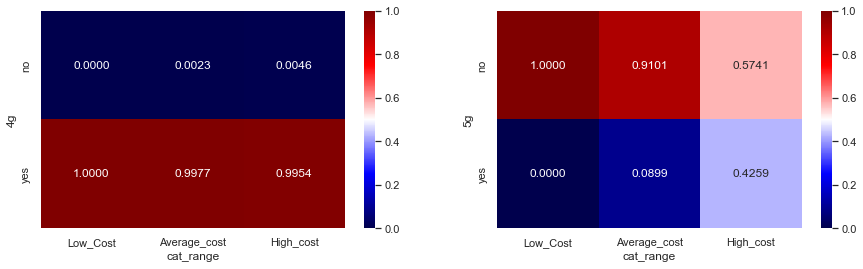

<IPython.core.display.Javascript object>

In [141]:
#Creating a crosstab for 4g & 5g devices splitted by price ranges
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(
        df_selcamera_8mp["4g"], df_selcamera_8mp["cat_range"], normalize="columns"
    ),
    annot=True,
    fmt=".4f",
    cmap="seismic",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(
        df_selcamera_8mp["5g"], df_selcamera_8mp["cat_range"], normalize="columns"
    ),
    annot=True,
    fmt=".4f",
    cmap="seismic",
) 

plt.show()

#### Observations:
* Condition: New devices Selfie Camera Resolution > 8 Megapixels for 4g & 5g devices: 
 * 4G= 100% of the low_cost 4G new devices have 4g enabled, 99.7% of the Average_cost has 4g enabled, and the 99.54% of the High_cost of new devices has 4g enabled.
 * 5G= 0 % of the low_cost 5G new devices have 5g enabled, 8% of the Average_cost has 5g enabled, and the 42.5% of the High_cost new devices has 5g enabled.

In [142]:
# We can create categories according to the ranges of the price for the new devices in order to stablish a proper pricing strategy
df_screen_6in["cat_range"] = pd.cut(
    x=df_screen_6in.new_price,
    bins=[-np.infty, 100, 250, np.infty],
    labels=["Low_Cost", "Average_cost", "High_cost"],
)

df_screen_6in["cat_range"].value_counts()


High_cost       547
Average_cost    481
Low_Cost         71
Name: cat_range, dtype: int64

<IPython.core.display.Javascript object>

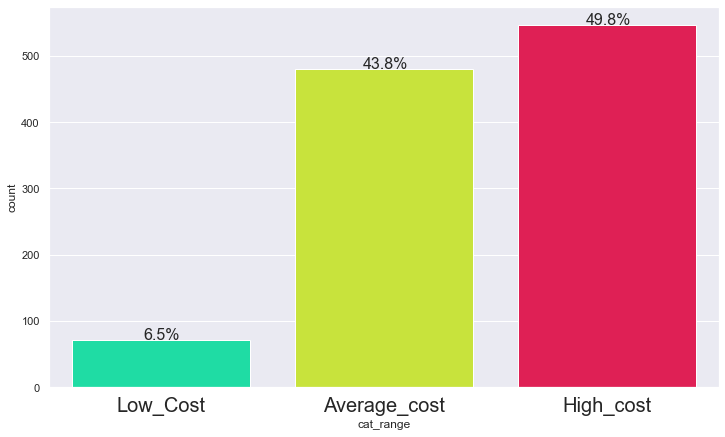

<IPython.core.display.Javascript object>

In [143]:
labeled_barplot(df_screen_6in, "cat_range", perc=True, n=10)

#### Observations:
* What we consider in this study as High_cost (>400€) has the greatest percentage weight with 49.8% (547) within the new devices with a screen size greater than 6 inches.
* With a 43.8%(481) we have the new devices that are below between 120-400€ and have a screen size over 6 inches.
* Just the 6.5%(71) of the new devices with screen size greater than 6 inches are under 120€.

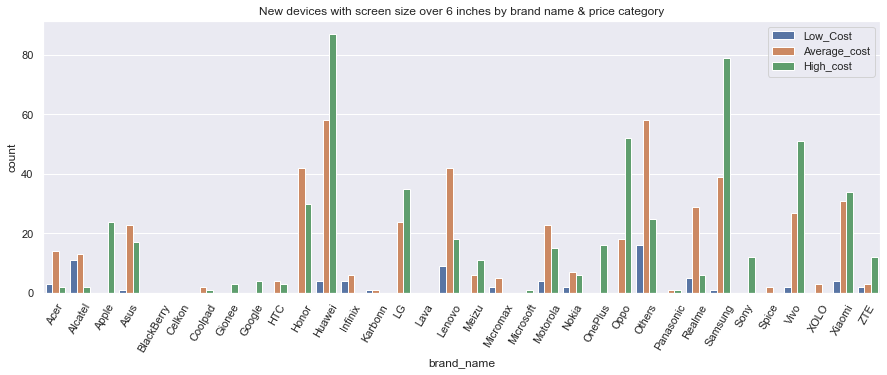

<IPython.core.display.Javascript object>

In [144]:
## Countplot to see by companies how many new devices with screen size greater than 6 inches fall in the different price category established
plt.figure(figsize=(15, 5))
sns.countplot(x="brand_name", data=df_screen_6in, hue="cat_range")
plt.xticks(rotation=60)
plt.title("New devices with screen size over 6 inches by brand name & price category")
plt.legend(loc=1)
plt.show()

#### Observations:
* Huawei and Samsung are the brands with the most new devices in High_cost with a screen size over 6 inches. They are followed by Vivo and Oppo.
* Huawei and Other lead with the highest number of new devices in the Average_cost category 120-400€ for screen size over 6 inches.
* Alcatel and Others are the brands with highest number of new devices in the Low_cost range < 120€.

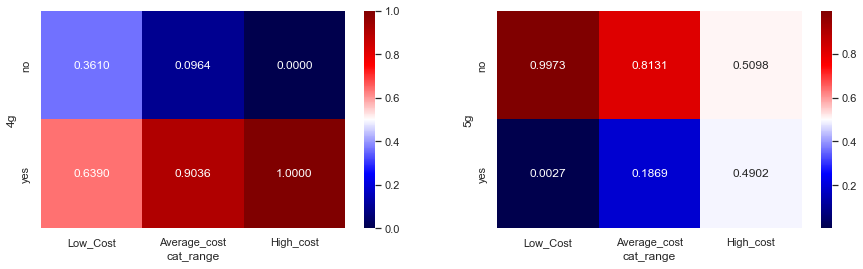

<IPython.core.display.Javascript object>

In [157]:
# Creating a crosstab for 4g & 5g devices splitted by price ranges
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df_screen_6in["4g"], df_screen_6in["cat_range"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="seismic",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(df_screen_6in["5g"], df_screen_6in["cat_range"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="seismic",
)

plt.show()

#### Observations:
* Condition: Screen size > 6 inches for 4g & 5g devices: 
 * 4G= 45% of the low_cost 4G new devices have 4g enabled, 74.6% of the Average_cost has 4g enabled, and the 92.8% of the High_cost of new devices has 4g enabled.
 * 5G= 0 % of the low_cost 5G new devices have 5g enabled, 2% of the Average_cost has 5g enabled, and the 25.4% of the High_cost new devices has 5g enabled.

In [148]:
# We can create categories according to the ranges of the price for the new devices in order to stablish a proper pricing strategy
# Battery capacity > 4500 mAh new devices
df_battery_4500["cat_range"] = pd.cut(
    x=df_battery_4500.new_price,
    bins=[-np.infty, 120, 400, np.infty],
    labels=["Low_Cost", "Average_cost", "High_cost"],
)

df_battery_4500["cat_range"].value_counts()

Average_cost    257
High_cost        62
Low_Cost         22
Name: cat_range, dtype: int64

<IPython.core.display.Javascript object>

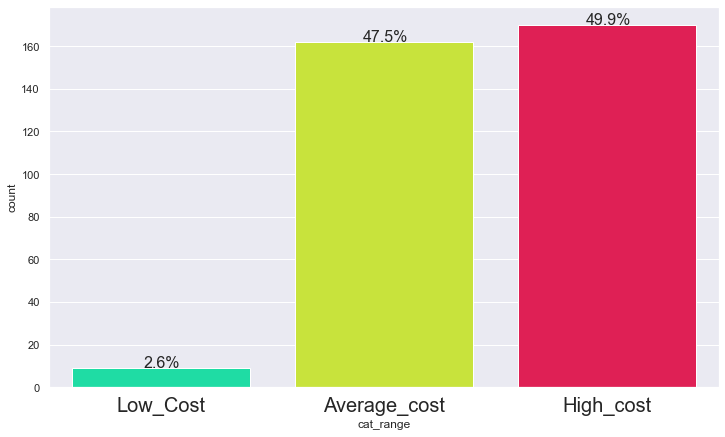

<IPython.core.display.Javascript object>

In [147]:
labeled_barplot(df_battery_4500, "cat_range", perc=True, n=10)

#### Observations:
* What we consider in this study as High_cost (120€-400€) has the greatest percentage weight with 49.9% (257) within the new devices with a battery capacity over 4500 mAh.
* With a 47.5%(62) we have the new devices that are considered Average_cost between 120€-400€, and have a battery capacity over 4500 mAh.
* Just the 2.6%(22) of the new devices with a battery capacity greater than 4500 mAh are under 120€.

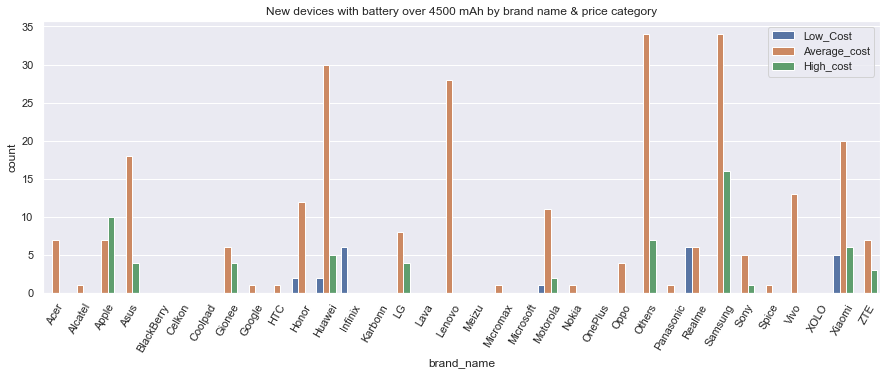

<IPython.core.display.Javascript object>

In [149]:
## Countplot to see by companies how many new devices with battery capacity greater than 4500mAh fall in the different price category established
plt.figure(figsize=(15, 5))
sns.countplot(x="brand_name", data=df_battery_4500, hue="cat_range")
plt.xticks(rotation=60)
plt.title("New devices with battery over 4500 mAh by brand name & price category")
plt.legend(loc=1)
plt.show()

#### Observations:
* Samsung, Huawei, Lenovo and others are the brands with the most new devices in Average_cost with a battery capacity over 4500 mAh. They are followed by Xaomi, Asus, Vivo, and Honor.
* Samsung is the brand with the highest number of new devices in the High_cost category >400€ for a battery capacity over 4500 mAh.
* Infinix, Realme, and Xiaomi are the brands with highest number of new devices in the Low_cost range <120€.

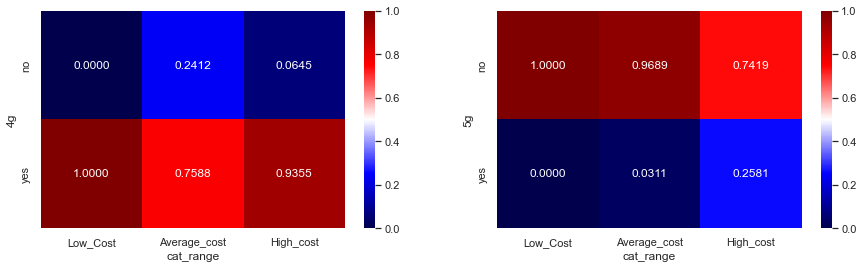

<IPython.core.display.Javascript object>

In [158]:
# Creating a crosstab for 4g & 5g devices splitted by price ranges
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(
        df_battery_4500["4g"], df_battery_4500["cat_range"], normalize="columns"
    ),
    annot=True,
    fmt=".4f",
    cmap="seismic",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(
        df_battery_4500["5g"], df_battery_4500["cat_range"], normalize="columns"
    ),
    annot=True,
    fmt=".4f",
    cmap="seismic",
)

plt.show()

#### Observations:
* Condition: Battery Capacity > 4500 mAh for 4g & 5g devices: 
 * 4G= 100% of the low_cost 4G new devices have 4g enabled, 75.8% of the Average_cost category has 4g enabled, and the 93.5% of the High_cost of new devices has 4g enabled.
 * 5G= 0 % of the low_cost 5G new devices have 5g enabled, 3% of the Average_cost has 5g enabled, and the 25.8% of the High_cost new devices has 5g enabled.

### Missing Value Imputation

- Imputing the missing values in the data by the column medians grouped by "release_year" and "brand_name".

In [104]:
# Creating a copy of the dataset df1
df2 = df1.copy()

<IPython.core.display.Javascript object>

In [105]:
# Checking the information to validate the missing values per column and the category type again
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3275 non-null   float64 
 6   selfie_camera_mp  3452 non-null   float64 
 7   int_memory        3450 non-null   float64 
 8   ram               3450 non-null   float64 
 9   battery           3448 non-null   float64 
 10  weight            3447 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

<IPython.core.display.Javascript object>

#### Observations:
* We can see missing values in the columns: "Main_camera_mp", "selfie_camera_mp", "int_memory", "ram", "battery", and "weight".
 

In [106]:
# Counting the missing values per column
df2.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
ram                   4
int_memory            4
selfie_camera_mp      2
release_year          0
used_price_log        0
used_price            0
new_price             0
days_used             0
brand_name            0
os                    0
5g                    0
4g                    0
screen_size           0
new_price_log         0
dtype: int64

<IPython.core.display.Javascript object>

In [107]:
# adding the missing values
df2.isnull().sum(axis=1).value_counts()

0    3253
1     200
2       1
dtype: int64

<IPython.core.display.Javascript object>

In [108]:
# Treating the missing values in the imput_columns with median by grouping the data on "release year" and "brand name"
imput_columns = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in imput_columns:
    df2[col] = df2.groupby(["release_year", "brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

<IPython.core.display.Javascript object>

* The most recommended way to impute the missing values from these features is applying the median value for the feature.

In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3275 non-null   float64 
 6   selfie_camera_mp  3452 non-null   float64 
 7   int_memory        3454 non-null   float64 
 8   ram               3454 non-null   float64 
 9   battery           3448 non-null   float64 
 10  weight            3447 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

<IPython.core.display.Javascript object>

In [110]:
df2.isnull().sum(axis=1).value_counts()

0    3260
1     194
dtype: int64

<IPython.core.display.Javascript object>

In [111]:
# imputing the remaining missing values in the data by the column medians grouped by brand_name.
imput_columns = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in imput_columns:
    df2[col] = df2.groupby(["brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

<IPython.core.display.Javascript object>

In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3444 non-null   float64 
 6   selfie_camera_mp  3454 non-null   float64 
 7   int_memory        3454 non-null   float64 
 8   ram               3454 non-null   float64 
 9   battery           3454 non-null   float64 
 10  weight            3454 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

<IPython.core.display.Javascript object>

In [113]:
# filling the remaining missing values in the "main_camera_m"p column by the column median.
df2["main_camera_mp"] = df2["main_camera_mp"].fillna(df2["main_camera_mp"].median())

<IPython.core.display.Javascript object>

In [159]:
# Checking for missing values again
df2.isnull().sum(axis=1).value_counts()

0    3454
dtype: int64

<IPython.core.display.Javascript object>

In [115]:
#Checking the information to validate is all the missing values has been filled
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3454 non-null   float64 
 6   selfie_camera_mp  3454 non-null   float64 
 7   int_memory        3454 non-null   float64 
 8   ram               3454 non-null   float64 
 9   battery           3454 non-null   float64 
 10  weight            3454 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

<IPython.core.display.Javascript object>

#### Observations:
* All the missing values were filled properly in the dataset df2.

### used_priced

### Outlier Detection

- Let's plot the boxplots of all columns to check for outliers.

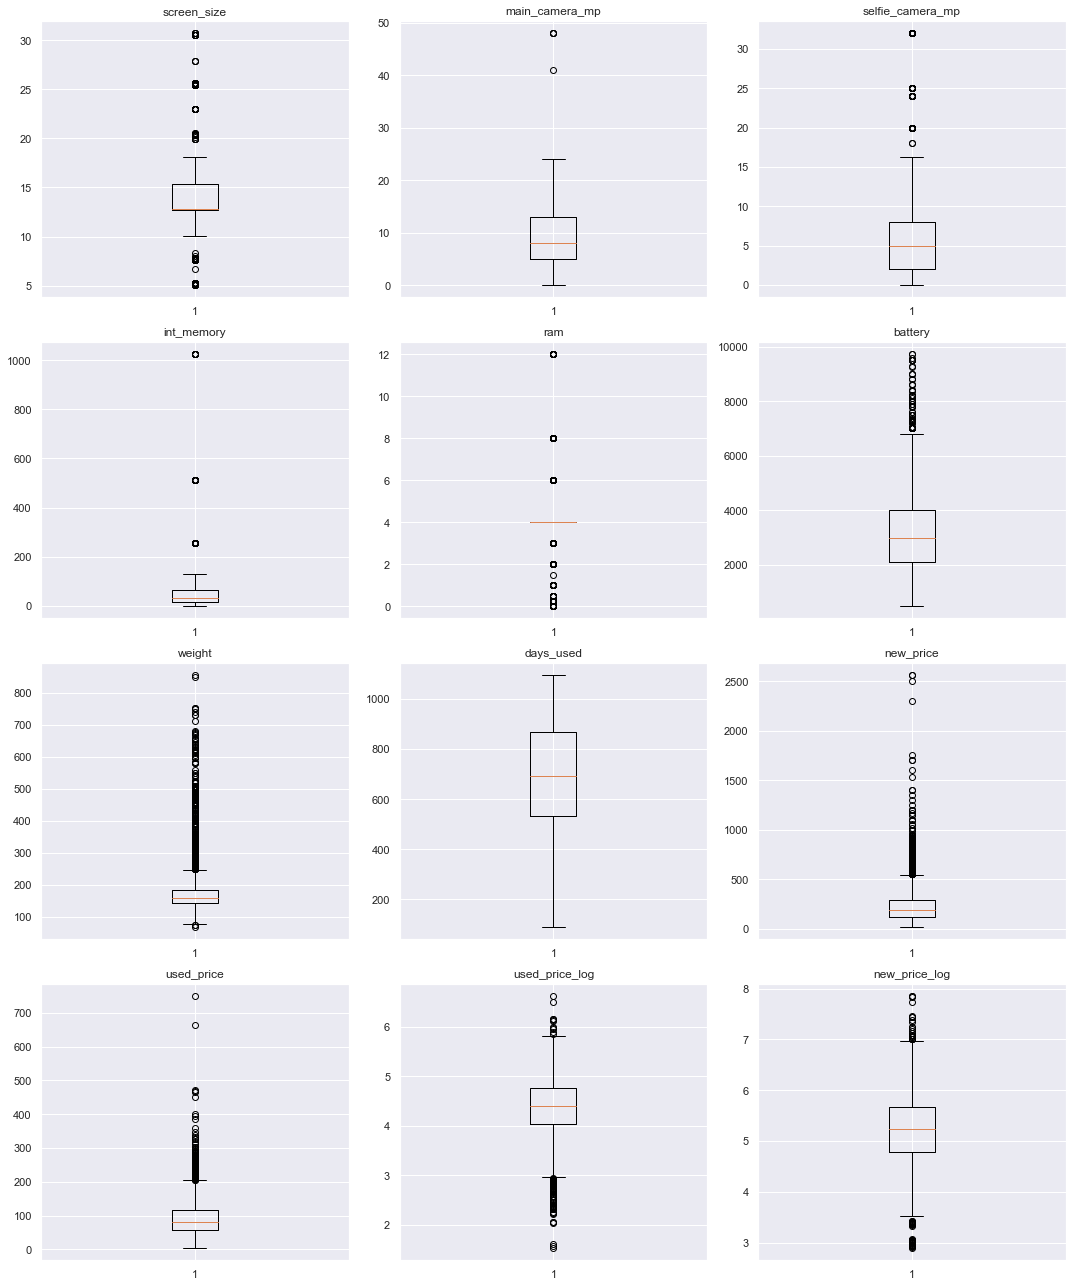

<IPython.core.display.Javascript object>

In [116]:
# Taken from Anime Prediction Rating Project
# outlier detection using boxplot
out_columns = df2.select_dtypes(include=np.number).columns.tolist()

# removing 'release year' since this is a temporal variable
out_columns.remove("release_year")

plt.figure(figsize=(15, 40))

for i, variable in enumerate(out_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

#### Observations:
* There were only just variables where the outlier treatment was an option. these two were new_price and used_price.
* We applied log transformation for those 2 variables, which solved the issue partially, taking the data closer to a normal distribution. 
* The most of the other variables were discrete and a oulier treatment is not recommended.
* Validating the data we could check that the outliers values for all the variables were within a real range. 

### Data Preparation for modeling

- The variable to predict is used device price, so we will use the normalized version `used_price_log` for modeling.
- Before building the model, we have to encode the categorical features.
- As we have done in all previous projects, we need to split the data into train and test to be able to evaluate the model that we are going to build on the train data.

In [117]:
# Defining the dependent and independent variables
X = df2.drop(
    ["new_price", "used_price", "used_price_log"],
    axis=1,
)
y = df2["used_price_log"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price_log  
0        127       4.715100  
1        325       5.519018  
2        162       5.884631  
3        345       5.630961  
4        293       4.947837  

0    4.

<IPython.core.display.Javascript object>

In [118]:
# Validating if we have some missing values
X.isnull().sum(axis=1).value_counts()

0    3454
dtype: int64

<IPython.core.display.Javascript object>

In [119]:
X.shape

(3454, 14)

<IPython.core.display.Javascript object>

In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3454 non-null   float64 
 6   selfie_camera_mp  3454 non-null   float64 
 7   int_memory        3454 non-null   float64 
 8   ram               3454 non-null   float64 
 9   battery           3454 non-null   float64 
 10  weight            3454 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price_log     3454 non-null   float64 
dtypes: category(4), float64(8), int64(2)
memory usage: 285.2 KB


<IPython.core.display.Javascript object>

In [121]:
# Now we have to create the dummies variable
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

   weight  release_year  days_used  new_price_log  ...  brand_name_Spice  \
0   146.0          2020        127       4.715100  ...                 0   
1   213.0          2020        325       5.519018  ...                 0   
2   213.0          2020        162       5.884631  ...                 0   
3   480.0          2020        345       5.630961  ...                 0   
4   185.0          2020        293       4.947837  ...                 0   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0                0                0                  0               0   
1                0                0                  0               0   
2                0                0                  0               0   
3                0                0                  0               0   
4                0                0                  0               0   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0          0           0       0       1       0  
1          0           0       0       1       1  
2          0           0       0       1       1  
3          0           0       0       1       1  
4          0           0       0       1       0  

[5 rows x 48 columns]

<IPython.core.display.Javascript object>

In [122]:
# lets split the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [123]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [124]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2417 entries, 3026 to 1061
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            2417 non-null   float64
 1   main_camera_mp         2417 non-null   float64
 2   selfie_camera_mp       2417 non-null   float64
 3   int_memory             2417 non-null   float64
 4   ram                    2417 non-null   float64
 5   battery                2417 non-null   float64
 6   weight                 2417 non-null   float64
 7   release_year           2417 non-null   int64  
 8   days_used              2417 non-null   int64  
 9   new_price_log          2417 non-null   float64
 10  brand_name_Alcatel     2417 non-null   uint8  
 11  brand_name_Apple       2417 non-null   uint8  
 12  brand_name_Asus        2417 non-null   uint8  
 13  brand_name_BlackBerry  2417 non-null   uint8  
 14  brand_name_Celkon      2417 non-null   uint8  
 15  b

<IPython.core.display.Javascript object>

## Building a Linear Regression model

* Let's build a linear regression model using statsmodels.

In [161]:
# let's add the intercept to the train data
x_train1 = sm.add_constant(x_train)
# let's add the intercept to the test data
x_test1 = sm.add_constant(x_test)

# fit linear model
olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     268.7
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:59:58   Log-Likelihood:                 123.85
No. Observations:                2417   AIC:                            -149.7
Df Residuals:                    2368   BIC:                             134.0
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -46.50

C:\Users\igorm\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>

In [218]:
# Checking the addition of the constant column
x_train1.shape

(2417, 49)

<IPython.core.display.Javascript object>

## Model performance evaluation

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

In [164]:
# function to compute adjusted R-squared
# Taken from Anime Rating Project
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target_exp = np.exp(
        target
    )  # calculating the euro value by applying the inverser logarhitm function
    pred_exp = np.exp(
        pred
    )  # calculating the euro value by applying the inverser logarhitm function

    # Calculating Performance KPI of the model

    # calculating rmse, mae and mape with np.exp(used_price_log): i.e. target_exp and pred_exp
    rmse = np.sqrt(mean_squared_error(target_exp, pred_exp))  # to compute RMSE
    mae = mean_absolute_error(target_exp, pred_exp)  # to compute MAE
    mape = mape_score(target_exp, pred_exp)  # to compute MAPE
    r2 = np.around(r2_score(target, pred), 4)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE - €": rmse,
            "MAE - €": mae,
            "MAPE - %": mape,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

### Checking the model performance

In [166]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel1, x_train1, y_train)
olsmodel_train_perf

Training Performance



RMSE - €    MAE - €   MAPE - %  R-squared  Adj. R-squared
0  25.125054  16.539533  18.872602     0.8449        0.841675

<IPython.core.display.Javascript object>

In [169]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel1, x_test1, y_test)
olsmodel_test_perf

Test Performance



RMSE - €    MAE - €  MAPE - %  R-squared  Adj. R-squared
0  24.257688  16.599489  19.45067     0.8425        0.834659

<IPython.core.display.Javascript object>

**Observations**

- The test $R^2$ is able to explain ~83.4% of variation in the data. Additionally the first iteration of the model is not presenting underfitting.

- The train and test RMSE and MAE are comparable, so first iteration of the model is not presenting overfitting either.

- MAE suggests that the model can predict used price within a mean error of 16.5 € on the test data.

- MAPE of 19.45 on the test data means that we are able to predict within 19.45% of the used price of the devices.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [172]:
# Taken from Life Expectancy Project
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        "{:.2f}".format(variance_inflation_factor(predictors.values, i))
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [173]:
# Running the first iteration of the with x_train1
checking_vif(x_train1)

feature         VIF
0                   const  3791593.34
1             screen_size        7.68
2          main_camera_mp        2.29
3        selfie_camera_mp        2.81
4              int_memory        1.36
5                     ram        2.28
6                 battery        4.08
7                  weight        6.40
8            release_year        4.90
9               days_used        2.66
10          new_price_log        3.12
11     brand_name_Alcatel        3.41
12       brand_name_Apple       13.06
13        brand_name_Asus        3.33
14  brand_name_BlackBerry        1.63
15      brand_name_Celkon        1.77
16     brand_name_Coolpad        1.47
17      brand_name_Gionee        1.95
18      brand_name_Google        1.32
19         brand_name_HTC        3.41
20       brand_name_Honor        3.34
21      brand_name_Huawei        5.98
22     brand_name_Infinix        1.28
23     brand_name_Karbonn        1.57
24          brand_name_LG        4.85
25        brand_name_Lava        1.71
26      brand_name_Lenovo        4.56
27       brand_name_Meizu        2.18
28    brand_name_Micromax        3.36
29   brand_name_Microsoft        1.87
30    brand_name_Motorola        3.27
31       brand_name_Nokia        3.48
32     brand_name_OnePlus        1.44
33        brand_name_Oppo        3.97
34      brand_name_Others        9.71
35   brand_name_Panasonic        2.11
36      brand_name_Realme        1.95
37     brand_name_Samsung        7.54
38        brand_name_Sony        2.94
39       brand_name_Spice        1.69
40        brand_name_Vivo        3.65
41        brand_name_XOLO        2.14
42      brand_name_Xiaomi        3.72
43         brand_name_ZTE        3.80
44              os_Others        1.86
45             os_Windows        1.60
46                 os_iOS       11.78
47                 4g_yes        2.47
48                 5g_yes        1.81

<IPython.core.display.Javascript object>

**Observations**

- We can observe that the most of the variables have a VIF under 5, suggesting a low multicollinearity.

- brand_name_Samsung, brand_name_others, brand_name_Huawei, weight, and screen_size have a VIF between 5 and 10, suggesting moderate multicollinearity.

- os_iOS and brand_name_Apple have a VIF exceeding 10, which is a sign of a high multicollinearity.

### Working on the multicollinearity

In [176]:
# Taken from the Life expectancy Project
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [177]:
col_list = [
    "screen_size",
    "weight",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  screen_size                           0.838381                 0.234703
1       weight                           0.838071                 0.234928

<IPython.core.display.Javascript object>

**Observations**

* When the screen size and weight variables are excluded, the adjusted r2 changes from 0.842 to 0.838.
* The VIF values continue to be higher than 5 for both variables and show similarities in the indicator, which suggests a possible collinearity between them..
* We will proceed to drop screen size which has the least impact on the model between
these two variables with the highest VIF > 5

In [219]:
# Dropping screen_size variable
col_to_drop = "screen_size"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

<IPython.core.display.Javascript object>

In [220]:
# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


feature         VIF
0                   const  3664322.54
1          main_camera_mp        2.28
2        selfie_camera_mp        2.81
3              int_memory        1.36
4                     ram        2.28
5                 battery        3.84
6                  weight        2.99
7            release_year        4.73
8               days_used        2.65
9           new_price_log        3.08
10     brand_name_Alcatel        3.41
11       brand_name_Apple       13.00
12        brand_name_Asus        3.33
13  brand_name_BlackBerry        1.63
14      brand_name_Celkon        1.77
15     brand_name_Coolpad        1.47
16      brand_name_Gionee        1.94
17      brand_name_Google        1.32
18         brand_name_HTC        3.40
19       brand_name_Honor        3.34
20      brand_name_Huawei        5.98
21     brand_name_Infinix        1.28
22     brand_name_Karbonn        1.57
23          brand_name_LG        4.83
24        brand_name_Lava        1.71
25      brand_name_Lenovo        4.55
26       brand_name_Meizu        2.18
27    brand_name_Micromax        3.36
28   brand_name_Microsoft        1.87
29    brand_name_Motorola        3.26
30       brand_name_Nokia        3.46
31     brand_name_OnePlus        1.44
32        brand_name_Oppo        3.97
33      brand_name_Others        9.65
34   brand_name_Panasonic        2.10
35      brand_name_Realme        1.94
36     brand_name_Samsung        7.52
37        brand_name_Sony        2.94
38       brand_name_Spice        1.68
39        brand_name_Vivo        3.65
40        brand_name_XOLO        2.14
41      brand_name_Xiaomi        3.71
42         brand_name_ZTE        3.79
43              os_Others        1.63
44             os_Windows        1.60
45                 os_iOS       11.68
46                 4g_yes        2.47
47                 5g_yes        1.81

<IPython.core.display.Javascript object>

In [181]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'new_price_log', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [182]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [185]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     895.7
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:59:02   Log-Likelihood:                 80.645
No. Observations:                2417   AIC:                            -131.3
Df Residuals:                    2402   BIC:                            -44.44
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -57.4521      6

<IPython.core.display.Javascript object>

In [186]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



RMSE - €    MAE - €   MAPE - %  R-squared  Adj. R-squared
0  26.063613  16.744516  19.184705     0.8392        0.838235

<IPython.core.display.Javascript object>

In [187]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(
    olsmodel2, x_test3, y_test
)  ## Complete the code to check performance on test data
olsmodel2_test_perf

Test Performance



RMSE - €    MAE - €   MAPE - %  R-squared  Adj. R-squared
0  24.544328  16.707116  19.669117     0.8384        0.836013

<IPython.core.display.Javascript object>

**Observations**

* The model is able to explain ~83% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable according to this context. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 19.6% of the used price of the devices.

* Hence, we can conclude the model olsmodel2 is good for prediction as well as inference purposes.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

In [189]:
# Creating a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head(15)

Actual Values  Fitted Values  Residuals
3026       4.087488       3.867319   0.220169
1525       4.448399       4.602001  -0.153602
1128       4.315353       4.286957   0.028395
3003       4.282068       4.195169   0.086899
2907       4.456438       4.490563  -0.034125
103        3.043570       3.324021  -0.280451
1758       4.238445       4.593790  -0.355346
1625       4.726591       4.516127   0.210464
683        4.426044       4.365338   0.060706
1863       3.189653       3.299148  -0.109496
3328       4.600560       5.110174  -0.509614
3177       3.945071       3.752962   0.192109
2056       4.508769       4.486468   0.022301
2159       5.315125       5.153619   0.161507
3058       4.222298       4.415226  -0.192928

<IPython.core.display.Javascript object>

In [190]:
df_pred.describe().T

count          mean       std       min       25%       50%  \
Actual Values  2417.0  4.367920e+00  0.583812  1.572774  4.037068  4.406597   
Fitted Values  2417.0  4.367920e+00  0.534830  2.651162  4.009898  4.380152   
Residuals      2417.0 -1.580500e-13  0.234079 -1.513845 -0.138322  0.029746   

                    75%       max  
Actual Values  4.757720  6.619433  
Fitted Values  4.729164  6.204215  
Residuals      0.168560  0.921824

<IPython.core.display.Javascript object>

In [191]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2417 entries, 3026 to 1061
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Actual Values  2417 non-null   float64
 1   Fitted Values  2417 non-null   float64
 2   Residuals      2417 non-null   float64
dtypes: float64(3)
memory usage: 75.5 KB


<IPython.core.display.Javascript object>

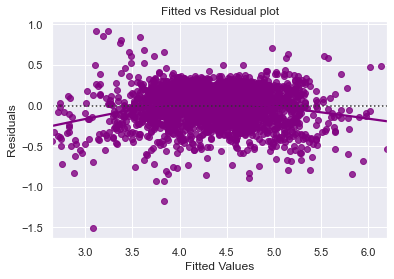

<IPython.core.display.Javascript object>

In [192]:
# let's plot the fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

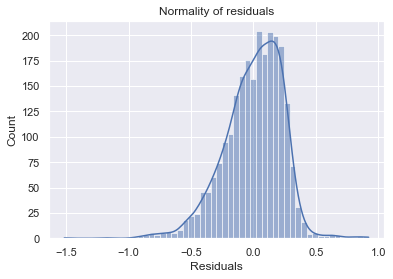

<IPython.core.display.Javascript object>

In [197]:
# Creating the graph for the residuals to evaluate the normality
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

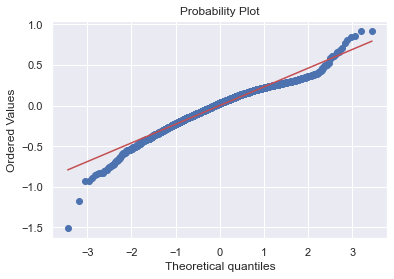

<IPython.core.display.Javascript object>

In [198]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [199]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995328206686811e-23)

<IPython.core.display.Javascript object>

**Observations**
* Most of the points are lying on the straight line in QQ plot, except the corners. 
* The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:
 * Null hypothesis - Data is normally distributed.
 * Alternate hypothesis - Data is not normally distributed.
* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal, so the assumption is satisfied.
 

### TEST FOR HOMOSCEDASTICITY

* **Homoscedacity** - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* **Heteroscedacity** - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check if model has Heteroscedasticity?**

* Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.

**How to deal with Heteroscedasticity?**

* Can be fixed via adding other important features or making transformations.

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [200]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

<IPython.core.display.Javascript object>

In [202]:
# Running goldfeldquandt test for the Homocesdasticity
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106772), ('p-value', 0.44019706506670375)]

<IPython.core.display.Javascript object>

* Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

In [204]:
# Running the predictions on the test set
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995  4.566741   4.385671
2341  3.696103   4.003934
1913  3.592093   3.643812
688   4.306495   4.103463
650   4.522115   5.113026
2291  4.259294   4.398406
40    4.997685   5.459871
1884  3.875359   4.053143
2538  4.206631   4.035868
45    5.380450   5.227899

<IPython.core.display.Javascript object>

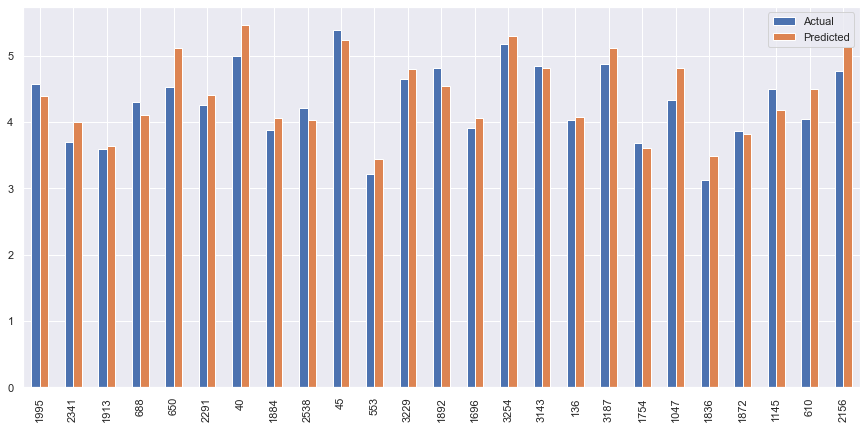

<IPython.core.display.Javascript object>

In [205]:
# Creating the graph to observe the differences between Actual and Predicted values
df_act_vs_pre = df_pred_test.sample(25, random_state=1)
df_act_vs_pre.plot(kind="bar", figsize=(15, 7))
plt.show()

**Observations**
* The differences between the actual values and the predicted values in this random sample are quite acceptable. However, it is noted that the predicted values are above the actual values in most cases of this sample.

## Final Model Summary

In [206]:
# Creating a copy of the latest train and test dataset
X_train_final = x_train3.copy()
X_test_final = x_test3.copy()

<IPython.core.display.Javascript object>

In [208]:
# Creating and printing the final model
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     895.7
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:46:46   Log-Likelihood:                 80.645
No. Observations:                2417   AIC:                            -131.3
Df Residuals:                    2402   BIC:                            -44.44
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -57.4521      6

<IPython.core.display.Javascript object>

In [209]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf_final = model_performance_regression(
    olsmodel2, X_train_final, y_train
)
olsmodel_train_perf_final

Training Performance



RMSE - €    MAE - €   MAPE - %  R-squared  Adj. R-squared
0  26.063613  16.744516  19.184705     0.8392        0.838235

<IPython.core.display.Javascript object>

In [211]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf_final = model_performance_regression(olsmodel2, x_test3, y_test)
olsmod2_test_perf_final

Test Performance



RMSE - €    MAE - €   MAPE - %  R-squared  Adj. R-squared
0  24.544328  16.707116  19.669117     0.8384        0.836013

<IPython.core.display.Javascript object>

**Observations**
* The model is able to explain ~84% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 19.6% of the used price. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.

In [216]:
# training performance comparison from Life expectancy Project
models_train_comp_df = pd.concat(
    [olsmodel_train_perf.T, olsmodel_train_perf_final.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Linear Regression (all variables)  \
RMSE - €                                25.125054   
MAE - €                                 16.539533   
MAPE - %                                18.872602   
R-squared                                0.844900   
Adj. R-squared                           0.841675   

                Linear Regression (selected variables)  
RMSE - €                                     26.063613  
MAE - €                                      16.744516  
MAPE - %                                     19.184705  
R-squared                                     0.839200  
Adj. R-squared                                0.838235

<IPython.core.display.Javascript object>

**Observations**
* The training performance comparison shows that:
 * RMSE increased 0.94€ with respect to the training model that included all the variables.
 * MAE increased 0.21€ with respect to the training model that included all the variables. 
 * MAPE increased 0.31 with respect to the training model that included all the variables.
 * R-squared decreased 0.0057 with respect to the training model that included all the variables.
 * Adj. R-squared decreased 0.0034 with respect to the training model that included all the variables.

In [215]:
# test performance comparison from Life Expectancy Project
models_test_comp_df = pd.concat(
    [olsmodel_test_perf.T, olsmod2_test_perf_final.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Linear Regression (all variables)  \
RMSE - €                                24.257688   
MAE - €                                 16.599489   
MAPE - %                                19.450670   
R-squared                                0.842500   
Adj. R-squared                           0.834659   

                Linear Regression (selected variables)  
RMSE - €                                     24.544328  
MAE - €                                      16.707116  
MAPE - %                                     19.669117  
R-squared                                     0.838400  
Adj. R-squared                                0.836013

<IPython.core.display.Javascript object>

**Observations**
* The test performance comparison shows that:
 * RMSE increased 0.29€ with respect to the test model that included all the variables.
 * MAE increased 0.11€ with respect to the test model that included all the variables. 
 * MAPE increased 0.21 with respect to the test model that included all the variables.
 * R-squared decreased 0.41 with respect to the test model that included all the variables.
 * Adj. R-squared increased 0.0014 with respect to the test model that included all the variables.

## Actionable Insights and Recommendations

* The Market of used and refurbished device market is huge and has been growning considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. Furthermore, in other media there is talk of a growth of 10% from 2022 to 2023. There are many good reasons that have made this market grow. Some of the main ones are that they provide a cheaper solution to those people or businesses that are looking to save some money when they buy a device, since some of the most recognized brands offer solid discounts. Also, these same major brands are offering certified, used devices with warranties, which makes it a very attractive deal for customers.

* ## Actionable Insights
   *  When we observed the distribution of the variables individually we realized the positive skewness ad Kurtosis of the used_price, new_price, and weight. We had to transform and reevaluate skewness' reduction. It was possible just in the case of the used_price and new_price variables.
   * The transformation for the discrete variables as screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, and battery was not considered due to his nature. 
   * the outliers belonging to each of the variables were considered within the normal and explainable range of the data. Therefore, we did not proceed to remove them.
   * The strongest correlations between the variables according to Pearson's coefficient were the following:
    * screen_size vs battery = + 0.81
    * screen_size vs weight = + 0.83
    * main_camera_mp vs used_price = + 0.46
    * main_camera_mp vs used_price_log = + 0.59
    * main_camera_mp vs new_price_log = + 0.54
    * selfie_camera_mp vs used_price = + 0.61
    * selfie_camera_mp vs days_used = - 0.55
    * ram vs new_price = + 0.49
    * ram vs used_price = + 0.53
    * battery vs weight = + 0.70
    * new_price vs used_price = + 0.81
    * used_price vs screen size = + 0.53
    * used_price vs main_camera_mp = + 0.46
    * used_price vs selfie_camera_mp = + 0.61
    * used_price vs battery = + 0.55
   * The ratio between the used price and the new price is high. Which is quite logical, as a device has a high initial price, it will possibly have a used price that will remain high over time.
* ## Business Insights
  * After exploratory analysis (EDA) we were able to understand the dataset, establish relationships and get an idea of the most important or fundamental relationships between the variables.
  * The top 5 brand names with devices in this dataset corresponds to: Others 14%(502) , Samsung 9.9%(341), Huawei 7.3%(251), LG 5.8%(201), and Lenovo 5%(171).
  * Android(3214) is the dominating Operating system within the dataset representing the 93.1% of the sample while "Others"(137) represents 4%, Windows(67) 1.9%, and IOS(36) 1%.
  * 4G category was composed of 2335 samples with "Yes", representing the 67.6%. The remaining 32.4%(1119) does not belongs to 4g category.
  *  5G category was composed of 152 samples with "Yes", representing the 4.4% meanwhile the 95.6%(3302) belongs to "No" category.
  * It is important to note that 4g and 5g are not complementary. From the previous analysis we determined that these two categories are not complementary, this means that not necessarily if it is not 4g technology we can assume that it is 5g or the opposite.
   * The top 5 of the brands with devices with the screen size over the 6 inches are:
    * Huawei 13.6%
    * Samsung 10.8%
    * Others 9%
    * Vivo 7.3%
    * Honor 6.6%
   * Since one of the strongest correlations between variables was between new_price and used_price, categories were created according to a price range estimated by the statistical indicators. This in order to divide them into Low_cost, Average_cost, and High_cost and evaluate their relationship with other categorical variables such as 4g and 5g and certain conditions according to battery capacity, screen size and resolution of the selfie camera. 
    * Categories for used_price: Low_cost < 100€, Average_cost 100-250€, High_cost > 250€.
    * Categories for new_price: Low_cost < 120€, Average_cost 120-400€, High_cost > 400€.
    * Honor is the brand with the most used devices in both Average_cost and High_cost with a selfie camera over 8 Mp. It is followed by Vivo, Oppo, Xaomi and Samsung. Karbonn is the brand with the highest number of used devices used in the low_cost category <100€.
    * Honor is the brand with the most used devices in Average_cost with a screen size over 6 inches. It is followed by  Samsung, Realme, Spice, and Xaomi. Oppo is the brand with the highest number of used devices in the low_cost category <100€ for screen size over 6 inches. Realme is the brand with highest number of used devices in the High_cost range >250€.
    * Samsung is the brand with the most used devices in Average_cost with a battery capacity over 4500 mAh. It is followed by Honor, Others, Xaomi, and Lenovo.
    * Oppo is the brand with the highest number of used devices in the low_cost category <100€ for a battery capacity over 4500 mAh. Others is the brand with highest number of used devices in the High_cost range >250€, followed by Samsung.
     * Huawei is the brand with the most new devices with Average_cost with a selfie camera over 8 Mp. It is followed by Vivo, Oppo, Xaomi, Samsung, and Honor. Oppo and Huawei are the brands with the highest number of new devices in the High_cost category >400€.
     * Huawei and Samsung are the brands with the most new devices in High_cost category with a screen size over 6 inches. They are followed by Vivo and Oppo.
     * Huawei and Other lead with the highest number of new devices in the Average_cost category 120-400€ for screen size over 6 inches. Alcatel and Others are the brands with highest number of new devices in the Low_cost range < 120€.
     * Samsung, Huawei, Lenovo and others are the brands with the most new devices in Average_cost with a battery capacity over 4500 mAh. They are followed by Xaomi, Asus, Vivo, and Honor.
     * Samsung is the brand with the highest number of new devices in the High_cost category >400€ for a battery capacity over 4500 mAh. Infinix, Realme, and Xiaomi are the brands with highest number of new devices in the Low_cost range <120€.
     * Average_cost category (100€-250€) has the greatest percentage weight with 82% (537) within the used devices with a resolution camera greater than 8 Megapixels, 11.6%(76) are below 100€, just the 6.4%(42) of the used devices with selfie cameras with a resolution over the 8 Mp are over 250€.
     * Average_cost category (100€-250€) has the greatest percentage weight with 61% (674) within the used devices with a screen size greater than 6 inches, 34%(374) of the used devices are below 100€ and have a screen size over 6 inches, just the 4.6%(51) of the used devices with screen size greater than 6 inches are over 250€.
     * Average_cost category (100€-250€) has the greatest percentage weight with 66.6% (227) within the used devices with a battery capacity over 4500 mAh, 29.9%(102) of the used devices are below 100€, just the 3.5%(12) of the used devices with a battery capacity greater than 4500 mAh are over 250€.
     * Average_cost category (120€-400€) has the greatest percentage weight with 66.3% (434) within the new devices with a resolution camera greater than 8 Megapixels, 33%(216) of the new devices are above 400€ or considered High_cost devices, just the 0.8%(5) of the new devices with selfie cameras with a resolution over the 8 Mp are under 120€.
     * High_cost category (>400€) has the greatest percentage weight with 49.8% (547) within the new devices with a screen size greater than 6 inches, 43.8%(481) of the new devices are between 120-400€ and have a screen size over 6 inches, just 6.5%(71) of the new devices with screen size greater than 6 inches are under 120€.
     * High_cost category (120€-400€) has the greatest percentage weight with 49.9% (257) within the new devices with a battery capacity over 4500 mAh, 47.5%(62) of the new devices that are considered Average_cost are between 120€-400€, just the 2.6%(22) of the new devices with a battery capacity greater than 4500 mAh are under 120€.
     * Condition: Selfie Camera Resolution > 8 Megapixels for 4g & 5g used devices: 
     * 4G= 100% of the low_cost 4G used devices have 4g enabled, 99.6% of the Average_cost has 4g enabled, and the 100% of the High_cost of used devices has 4g enabled.
     * 5G= 1.3 % of the low_cost 5G used devices have 5g enabled, 19.7% of the Average_cost has 5g enabled, and the 57.1% of the High_cost used devices has 5g enabled.
     * Condition: Screen size > 6 inches for 4g & 5g used devices: 
     * 4G= 63% of the low_cost 4G used devices have 4g enabled, 90.03% of the Average_cost has 4g enabled, and the 100% of the High_cost of used devices has 4g enabled.
     * 5G= 0.02 % of the low_cost 5G used devices have 5g enabled, 18.6% of the Average_cost has 5g enabled, and the 49.02% of the High_cost used devices has 5g enabled.
     * Condition: Battery Capacity > 4500 mAh for 4g & 5g used devices: 
     * 4G= 80% of the low_cost 4G used devices have 4g enabled, 79.7% of the Average_cost category has 4g enabled, and the 100% of the High_cost of used devices has 4g enabled.
     * 5G= 0 % of the low_cost 5G used devices have 5g enabled, 9% of the Average_cost has 5g enabled, and the 16.6% of the High_cost used devices has 5g enabled.
     * Condition: New devices Selfie Camera Resolution > 8 Megapixels for 4g & 5g devices: 
     * 4G= 100% of the low_cost 4G new devices have 4g enabled, 99.7% of the Average_cost has 4g enabled, and the 99.54% of the High_cost of new devices has 4g enabled.
     * 5G= 0 % of the low_cost 5G new devices have 5g enabled, 8% of the Average_cost has 5g enabled, and the 42.5% of the High_cost new devices has 5g enabled.
     * Condition: Screen size > 6 inches for 4g & 5g new devices: 
     * 4G= 45% of the low_cost 4G new devices have 4g enabled, 74.6% of the Average_cost has 4g enabled, and the 92.8% of the High_cost of new devices has 4g enabled.
     * 5G= 0 % of the low_cost 5G new devices have 5g enabled, 2% of the Average_cost has 5g enabled, and the 25.4% of the High_cost new devices has 5g enabled.
     * Condition: Battery Capacity > 4500 mAh for 4g & 5g devices: 
     * 4G= 100% of the low_cost 4G new devices have 4g enabled, 75.8% of the Average_cost category has 4g enabled, and the 93.5% of the High_cost of new devices has 4g enabled.
     * 5G= 0 % of the low_cost 5G new devices have 5g enabled, 3% of the Average_cost has 5g enabled, and the 25.8% of the High_cost new devices has 5g enabled.
* ## Conclusions
     * The variable that most influences our model more than any other, is the variable new_price_log(0.4415), since it presented the highest coefficient within the equation.
     * All the assumptions established for the linear regression models were satisfactorily fulfilled and therefore we can say that we have a fairly reliable predictive model for the price strategy of used devices.
     *The initial iteration of our test $R^2$ explained the ~83.4% of variation in the data. Additionally, it is not presenting underfitting.
     * The train and test RMSE and MAE are comparable, so first iteration of the model is not presenting overfitting either.

     * MAE suggests that the model can predict the used price of the devices within a mean error of 16.5 € on the test data.

     * MAPE of 19.45 on the test data suggested that we are able to predict within 19.45% of the used price of the devices.
     * The differences in the evaluation of the performance between the models before and after removing the variables, were quite small among all the statistical indicators (RMSE, MAE, MAPE, R Squared, and Adjusted R).
     * The prices of used devices have maintained a constant growth to date, these have been gaining market, possibly motivated by the good prices and guarantee plans that the strongest brands are offering, and possibly the growing culture of recycling that makes people experiment or get closer to used devices.
* ## Recommendations
     * Carry out a more balanced sample, as far as the operating system is concerned, since 93% of this dataset was dominated by Android.
     * As a price strategy, it is recommended to keep the devices in the Average_cost category, since in this sample the percentage weight combined with different conditions established for the equipment (screen size, Battery capacity, among others) dominated.
     *Include more information in the dataset and explore other conditions that allow a broader customer segmentation.
     *Maintain the iterative process of the model as the database grows with relevant information for the market study.
     